Değişkenler
mpg: Yakıt verimliliği, yani mil başına galon (miles per gallon). Bu veri setinde bağımlı değişken (target) olarak kullanılabilir.
cylinders: Motorun silindir sayısı. Genellikle motor büyüklüğü ve gücüyle ilgili bir göstergedir.
displacement: Motor hacmi (inç küp cinsinden). Motorun büyüklüğünü ve kapasitesini ifade eder.
horsepower: Beygir gücü. Motorun üretebildiği maksimum gücü gösterir.
weight: Aracın ağırlığı (pound cinsinden). Araç verimliliği ve performansı üzerinde etkili bir değişkendir.
acceleration: Aracın hızlanma süresi, 0'dan 60 mil/saat hıza ulaşmak için geçen süre (saniye cinsinden).
model_year: Model yılı (örneğin, 70 = 1970). Araç üretim yılına göre performans ve teknoloji seviyesini gösterir.
origin: Aracın üretildiği bölge. 1 = ABD, 2 = Avrupa, 3 = Japonya.
name: Araç adı. Marka ve model bilgisi içerir (örneğin, "chevrolet chevelle malibu").


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('auto-mpg.csv',delimiter=',')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [5]:
df.tail(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
388,26.0,4,156.0,92,2585,14.5,82,1,chrysler lebaron medallion
389,22.0,6,232.0,112,2835,14.7,82,1,ford granada l
390,32.0,4,144.0,96,2665,13.9,82,3,toyota celica gt
391,36.0,4,135.0,84,2370,13.0,82,1,dodge charger 2.2
392,27.0,4,151.0,90,2950,17.3,82,1,chevrolet camaro
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [6]:
df['horsepower'].describe()

count     398
unique     94
top       150
freq       22
Name: horsepower, dtype: object

In [7]:
df.shape

(398, 9)

In [8]:
df.describe(include=object)

,horsepower,car_name
count,398,398
unique,94,305
top,150,ford pinto
freq,22,6


In [9]:
np.unique(df['horsepower'])

array(['100', '102', '103', '105', '107', '108', '110', '112', '113',
       '115', '116', '120', '122', '125', '129', '130', '132', '133',
       '135', '137', '138', '139', '140', '142', '145', '148', '149',
       '150', '152', '153', '155', '158', '160', '165', '167', '170',
       '175', '180', '190', '193', '198', '200', '208', '210', '215',
       '220', '225', '230', '46', '48', '49', '52', '53', '54', '58',
       '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70',
       '71', '72', '74', '75', '76', '77', '78', '79', '80', '81', '82',
       '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93',
       '94', '95', '96', '97', '98', '?'], dtype=object)

In [10]:
# '?' değerlerini NaN ile değiştirme
df['horsepower'] = df['horsepower'].replace('?', np.nan)

# Sütunu sayısal türe dönüştürme
df['horsepower'] = df['horsepower'].astype(float)

# Dönüşüm sonrası kontrol
print(df['horsepower'].dtypes)
print(df['horsepower'].isnull().sum())  # NaN değer sayısını kontrol et


float64
6


In [11]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [12]:
# Eksik veri oranını kontrol etme
missing_percentage = df['horsepower'].isnull().mean() * 100
print(f"Missing Percentage: {missing_percentage:.2f}%")


Missing Percentage: 1.51%


In [13]:
df.dropna(subset=['horsepower'], inplace=True)
df.isnull().sum()


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [14]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [15]:
df=df.drop(columns=df.columns[8])


In [16]:
df.info

<bound method DataFrame.info of       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin  
0            70       1  
1            70       1  
2            70       1  

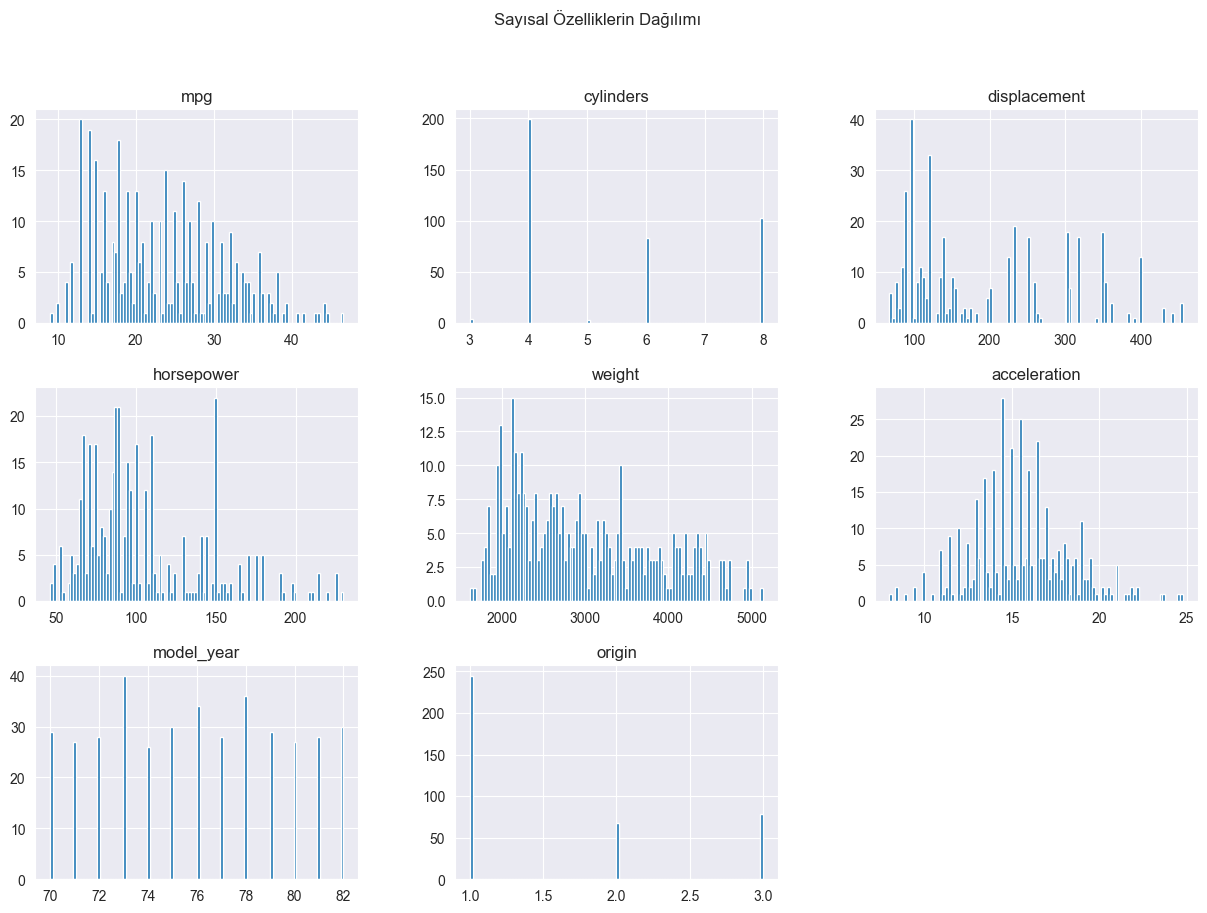

In [17]:
df.hist(bins=100, figsize=(15,10))
plt.suptitle('Sayısal Özelliklerin Dağılımı')
plt.show()

In [18]:
cylinders_count=df['cylinders'].value_counts()
print(cylinders_count)

cylinders
4    199
8    103
6     83
3      4
5      3
Name: count, dtype: int64


In [19]:
model_year_count=df['model_year'].value_counts()
print(model_year_count)

model_year
73    40
78    36
76    34
75    30
82    30
70    29
79    29
72    28
77    28
81    28
71    27
80    27
74    26
Name: count, dtype: int64


In [20]:
origin_value_count=df['origin'].value_counts()
print(origin_value_count)

origin
1    245
3     79
2     68
Name: count, dtype: int64


In [21]:
# Silindir ve model yılını kategorik değişkene çevirme
df['cylinders'] = df['cylinders'].astype('object')

# Dönüşüm sonrası kontrol
print(df.dtypes)


mpg             float64
cylinders        object
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin            int64
dtype: object


In [22]:
df['origin']= df['origin'].astype('object')

In [23]:
origin_value_count = df['origin'].value_counts()
print(origin_value_count)

origin
1    245
3     79
2     68
Name: count, dtype: int64


horsepower için Shapiro-Wilk testi p-değeri: 5.0220692907916354e-15
horsepower normal dağılımdan sapmaktadır.


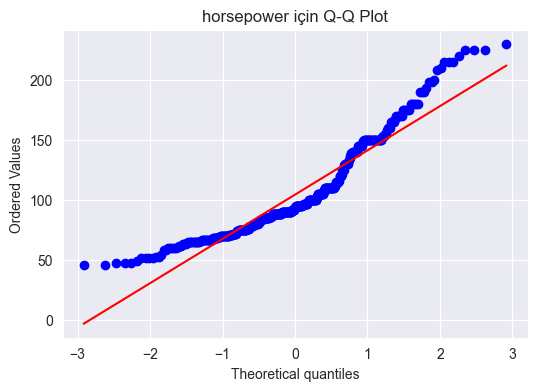

weight için Shapiro-Wilk testi p-değeri: 2.601685807651511e-11
weight normal dağılımdan sapmaktadır.


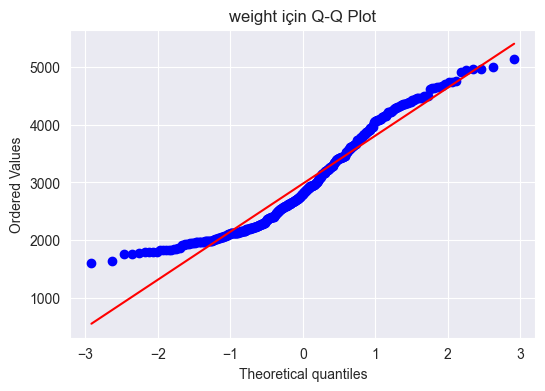

acceleration için Shapiro-Wilk testi p-değeri: 0.030528862000196957
acceleration normal dağılımdan sapmaktadır.


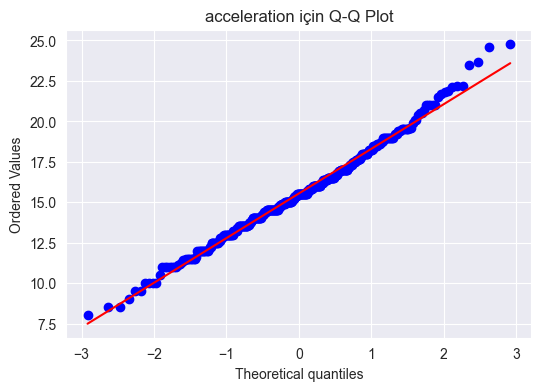

model_year için Shapiro-Wilk testi p-değeri: 1.2226170042046816e-10
model_year normal dağılımdan sapmaktadır.


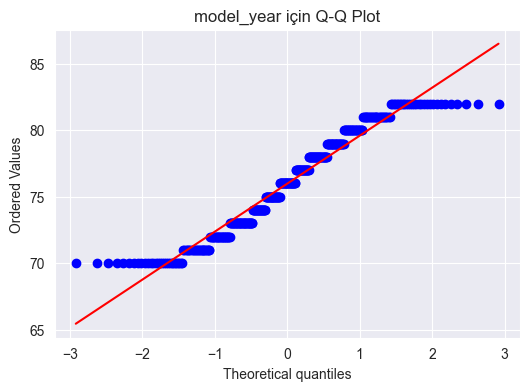

displacement için Shapiro-Wilk testi p-değeri: 8.983637114586926e-17
displacement normal dağılımdan sapmaktadır.


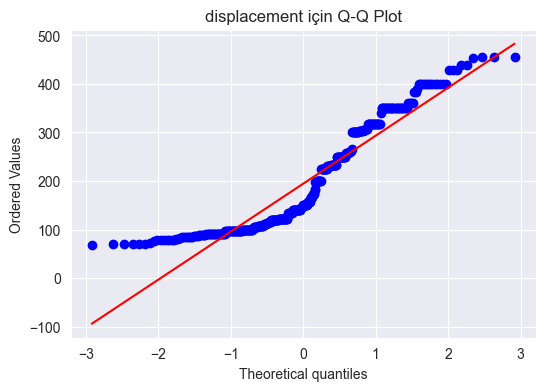

mpg için Shapiro-Wilk testi p-değeri: 1.0494407063380879e-07
mpg normal dağılımdan sapmaktadır.


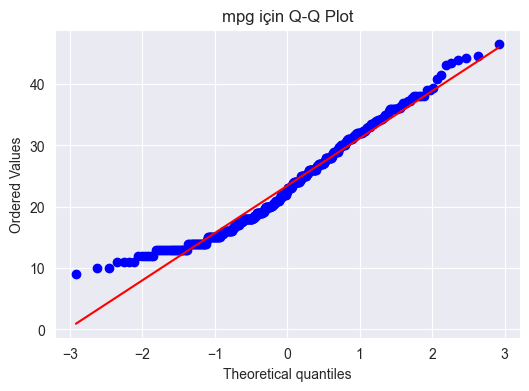

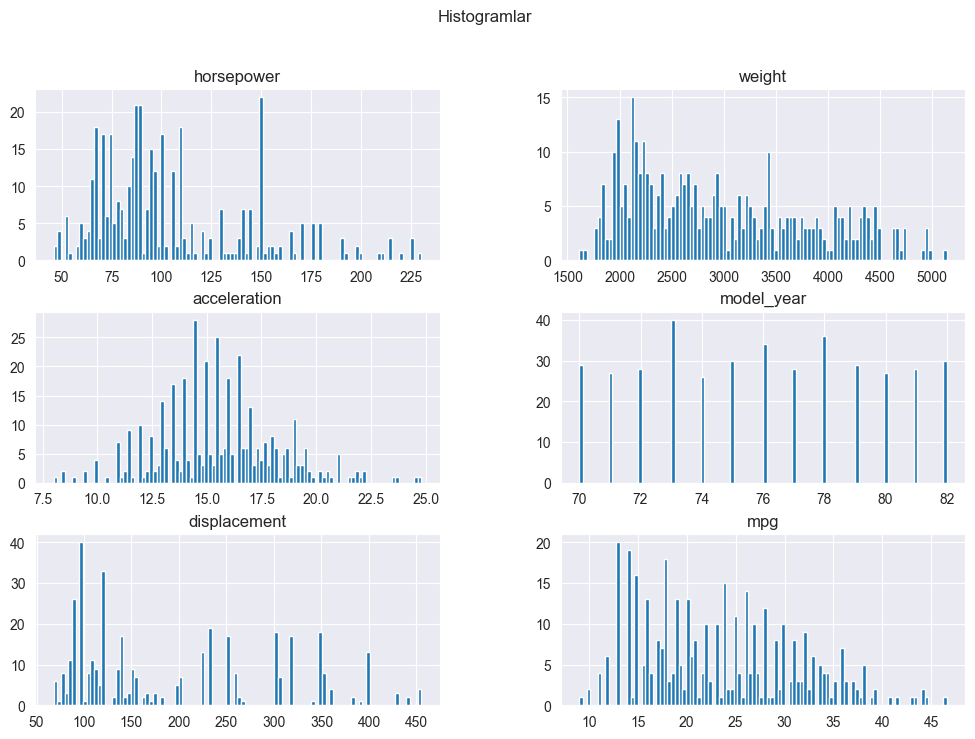

In [24]:
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Sürekli değişkenlerin listesi
continuous_cols = ['horsepower', 'weight', 'acceleration', 'model_year', 'displacement', 'mpg']
# Her bir sürekli değişken için Shapiro-Wilk testi
for col in continuous_cols:
    stat, p_value = stats.shapiro(df[col].dropna())  # NaN değerlerini atıyoruz
    print(f"{col} için Shapiro-Wilk testi p-değeri: {p_value}")
    if p_value < 0.05:
        print(f"{col} normal dağılımdan sapmaktadır.")
    else:
        print(f"{col} normal dağılımdan sapmamaktadır.")
    # Q-Q Plot
    plt.figure(figsize=(6, 4))
    stats.probplot(df[col].dropna(), dist="norm", plot=plt)
    plt.title(f"{col} için Q-Q Plot")
    plt.show()

# Histogramlar
df[continuous_cols].hist(bins=100, figsize=(12, 8))
plt.suptitle("Histogramlar")
plt.show()



In [25]:
#Null Hipotez (H₀):
#Gruplar arasında (origin = 1, origin = 2, origin = 3) ortalama mpg değerlerinde anlamlı bir fark yoktur. Yani, üç #grubun ortalamaları birbirine eşittir.

#Alternatif Hipotez (H₁):
#Gruplar arasında (origin = 1, origin = 2, origin = 3) ortalama mpg değerlerinde anlamlı bir fark vardır. Yani, en a bir grup ortalaması diğerlerinden farklıdır.

In [26]:
from scipy.stats import f_oneway

# Grupları oluşturma
group1 = df[df["origin"] == 1]["mpg"]
group2 = df[df["origin"] == 2]["mpg"]
group3 = df[df["origin"] == 3]["mpg"]

# ANOVA testi
f_stat, p_value = f_oneway(group1, group2, group3)
print(f"F-Statistic: {f_stat}, P-Value: {p_value}")


F-Statistic: 96.60153016314952, P-Value: 8.673818448009697e-35


In [27]:
#Eşleme işlemi için bir sözlük oluşturuyoruz
origin_mapping = {1: "ABD", 2: "Avrupa", 3: "Japonya"}

# 'origin' sütunundaki sayısal değerleri ülke isimlerine eşliyoruz
df['origin'] = df['origin'].map(origin_mapping)

# Değişikliğin başarılı olup olmadığını kontrol edelim
print(df['origin'].head())

0    ABD
1    ABD
2    ABD
3    ABD
4    ABD
Name: origin, dtype: object


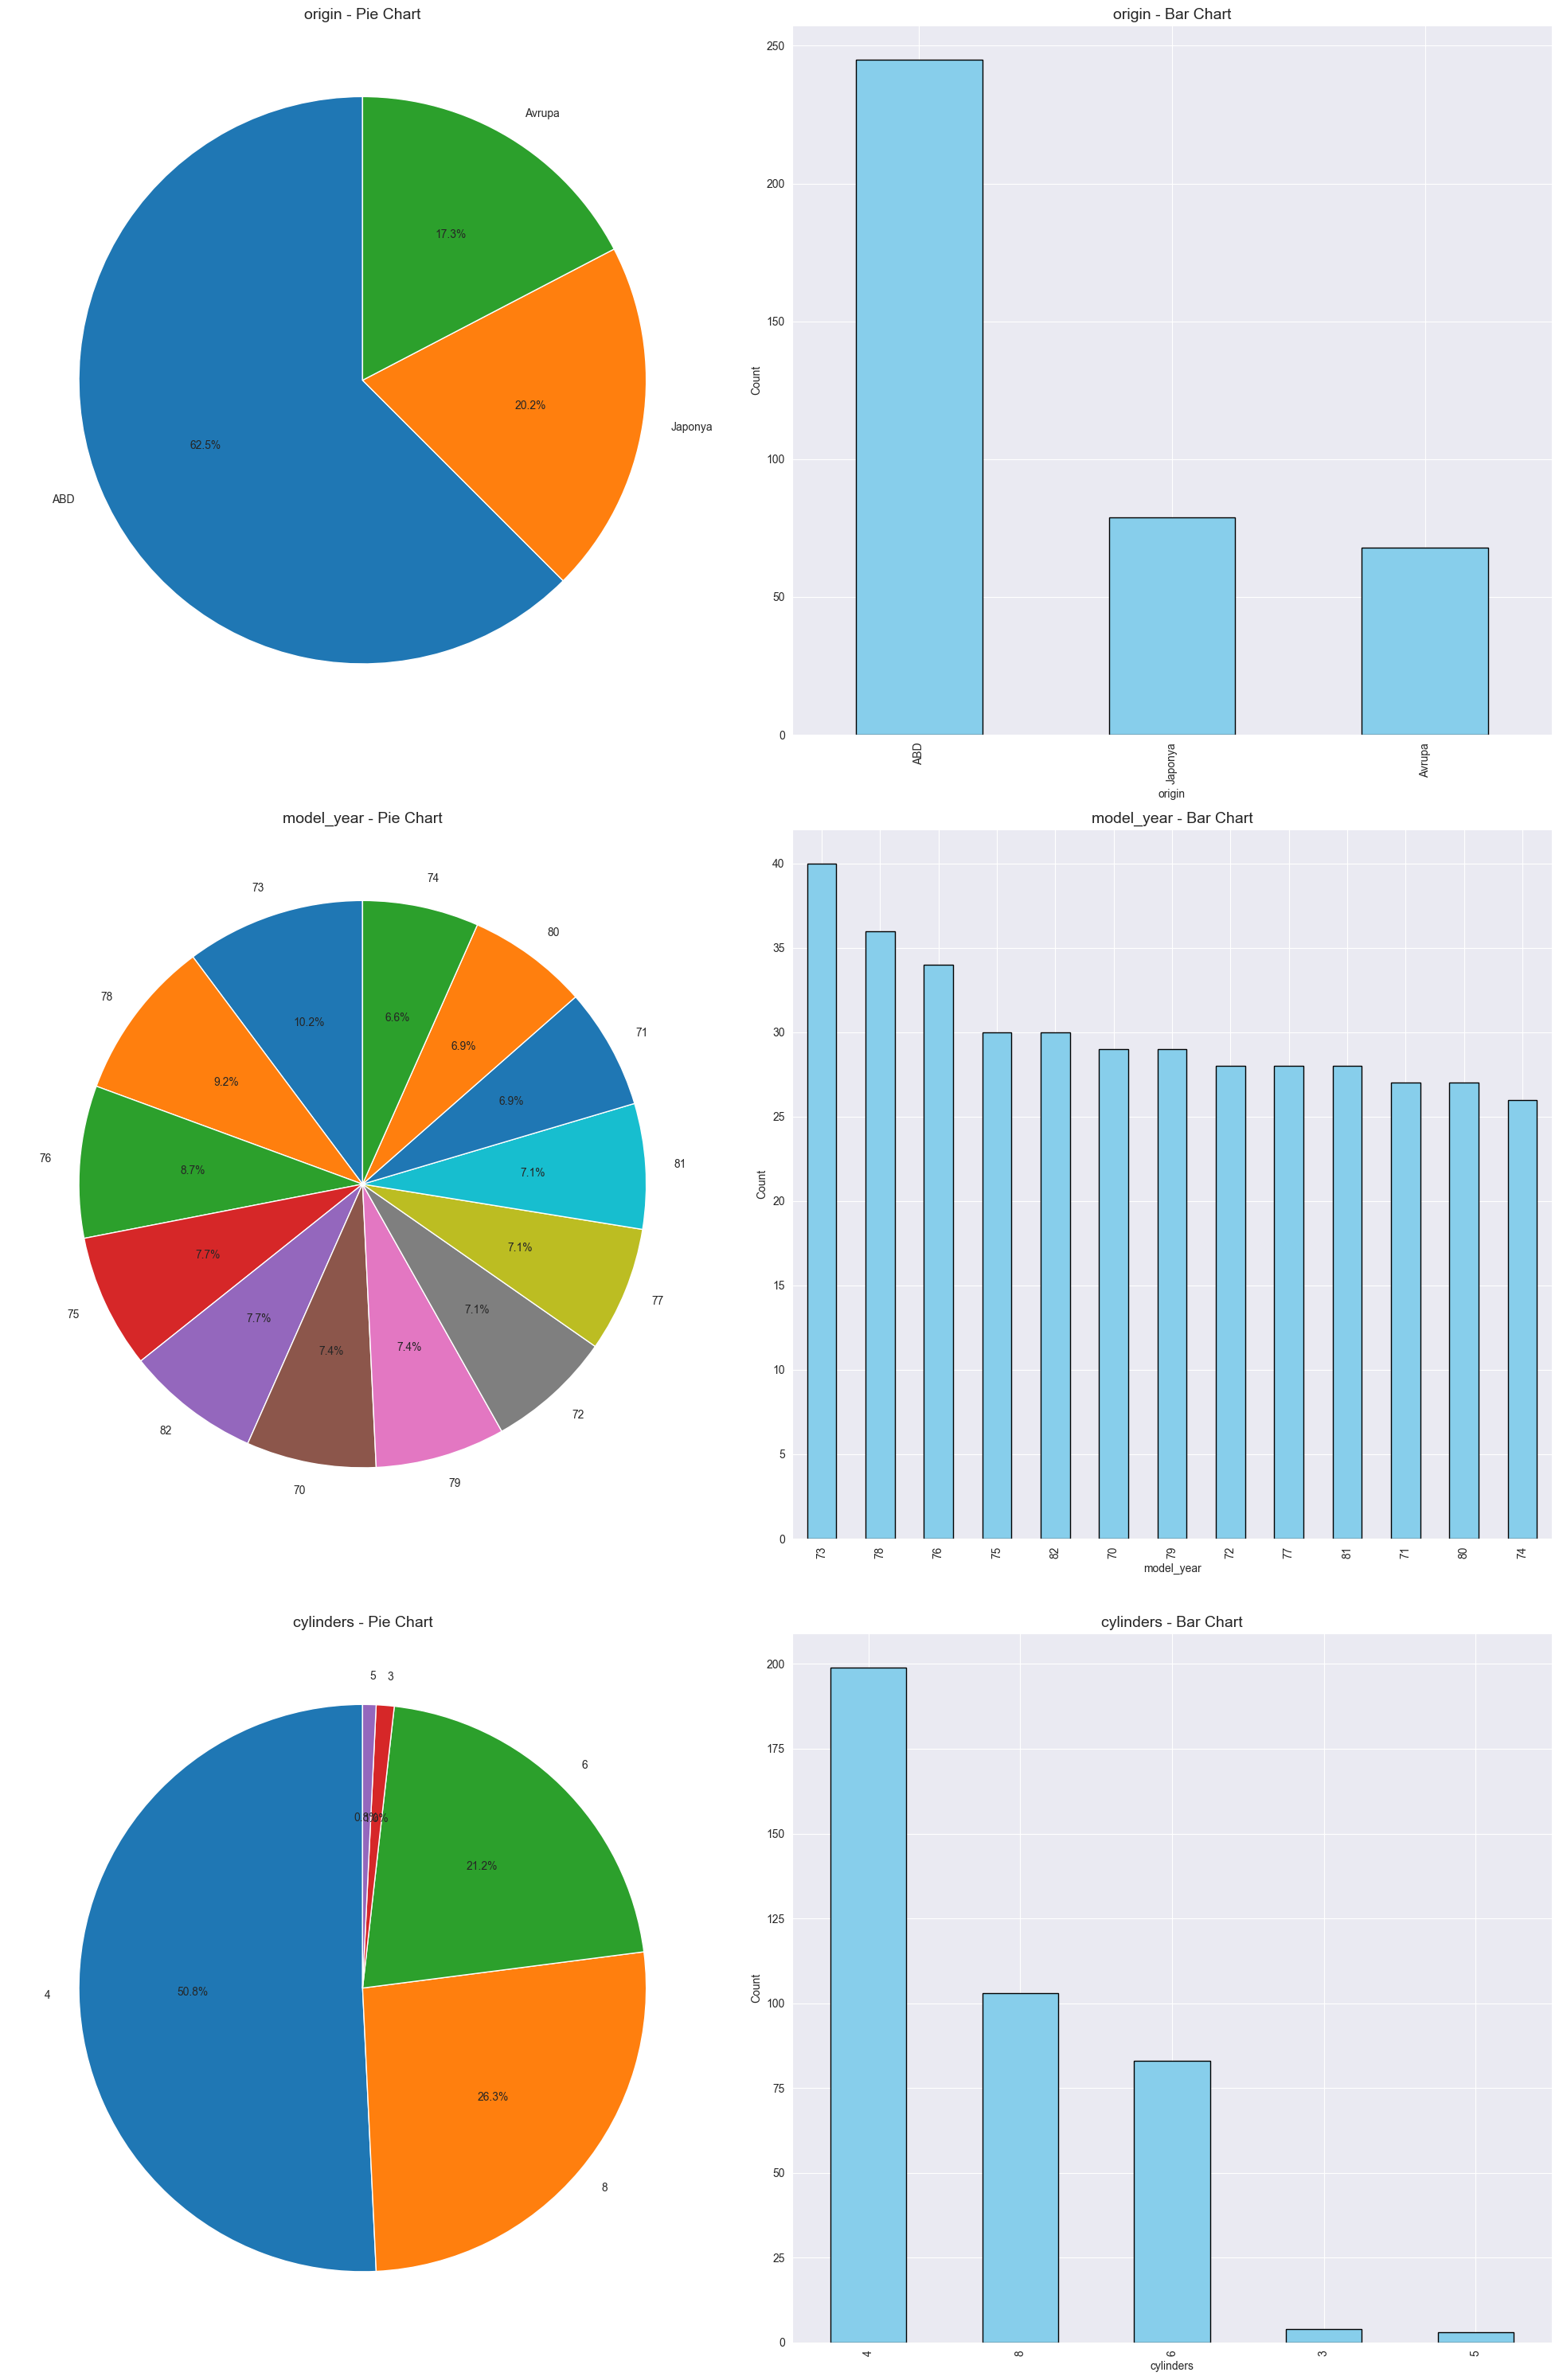

In [28]:
import matplotlib.pyplot as plt


def count_pie(df, col, ax):
    counts = df[col].value_counts()
    ax[0].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    ax[0].set_title(f"{col} - Pie Chart", fontsize=14)
    # Bar grafiği çiz
    counts.plot(kind='bar', ax=ax[1], color='skyblue', edgecolor='black')
    ax[1].set_title(f"{col} - Bar Chart", fontsize=14)
    ax[1].set_xlabel(col)
    ax[1].set_ylabel("Count")


cat_cols = ["origin", "model_year", "cylinders"]
fig, ax = plt.subplots(3, 2, figsize=(20, 30))

for i, col in enumerate(cat_cols):
    count_pie(df, col, ax=(ax[i % 3, i // 3], ax[i % 3, i // 3 + 1]))

plt.tight_layout()
plt.show()



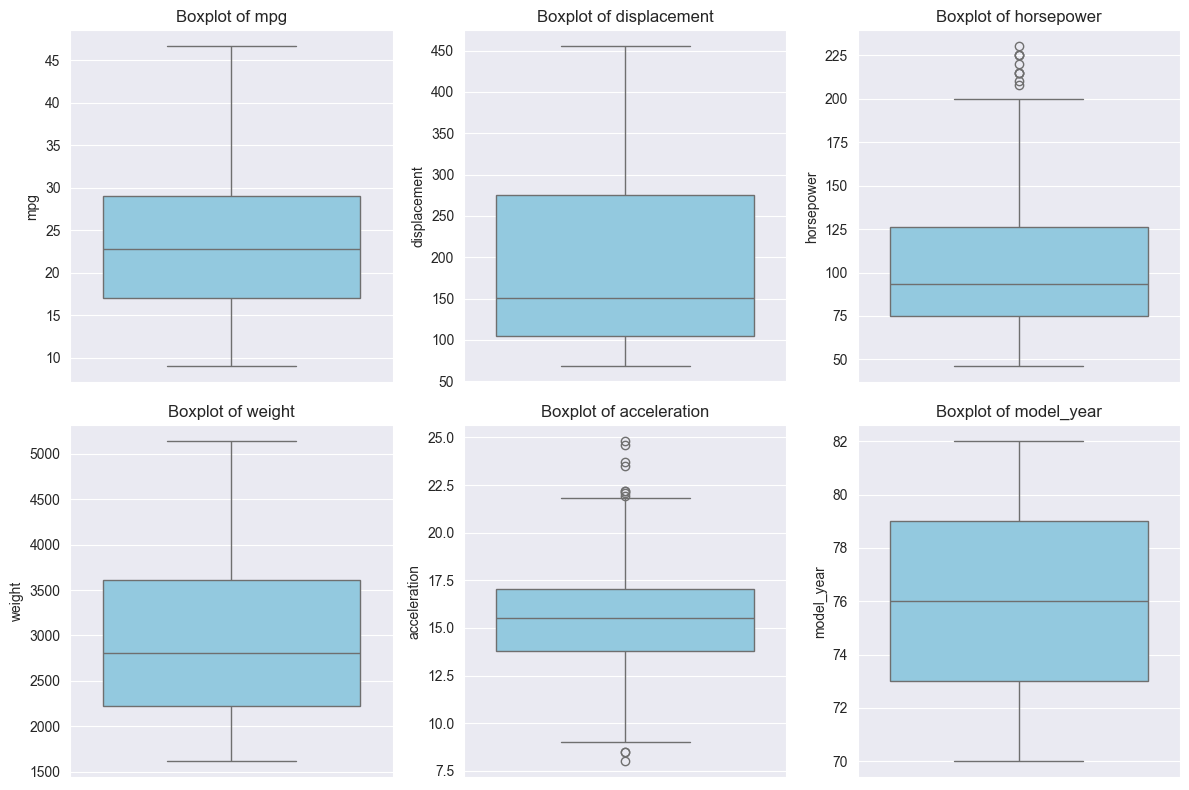

In [29]:
# Sayısal değişkenleri seçme
numeric_columns = df.select_dtypes(include=np.number).columns

# Tüm sayısal değişkenler için boxplot oluşturma
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[column], color="skyblue")
    plt.title(f"Boxplot of {column}")
    plt.tight_layout()

plt.show()


In [30]:
# Aykırı değerleri tespit etmek için IQR hesaplama
Q1 = df['horsepower'].quantile(0.25)
Q3 = df['horsepower'].quantile(0.75)
IQR = Q3 - Q1

# Aykırı değerlerin alt ve üst sınırlarını belirle
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerleri tespit et
outliers1 = df[(df['horsepower'] < lower_bound) | (df['horsepower'] > upper_bound)]

print(outliers1)


      mpg cylinders  displacement  horsepower  weight  acceleration  \
6    14.0         8         454.0       220.0    4354           9.0   
7    14.0         8         440.0       215.0    4312           8.5   
8    14.0         8         455.0       225.0    4425          10.0   
13   14.0         8         455.0       225.0    3086          10.0   
25   10.0         8         360.0       215.0    4615          14.0   
27   11.0         8         318.0       210.0    4382          13.5   
67   11.0         8         429.0       208.0    4633          11.0   
94   13.0         8         440.0       215.0    4735          11.0   
95   12.0         8         455.0       225.0    4951          11.0   
116  16.0         8         400.0       230.0    4278           9.5   

     model_year origin  
6            70    ABD  
7            70    ABD  
8            70    ABD  
13           70    ABD  
25           70    ABD  
27           70    ABD  
67           72    ABD  
94           73   

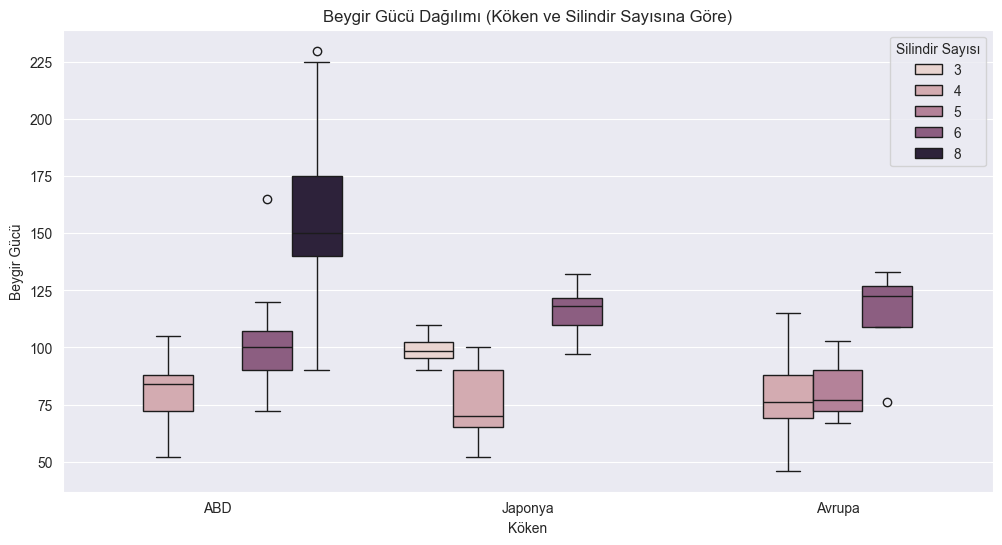

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Köken ve silindir sayısına göre beygir gücü dağılımı
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="origin", y="horsepower", hue="cylinders")
plt.title("Beygir Gücü Dağılımı (Köken ve Silindir Sayısına Göre)")
plt.xlabel("Köken")
plt.ylabel("Beygir Gücü")
plt.legend(title="Silindir Sayısı")
plt.show()


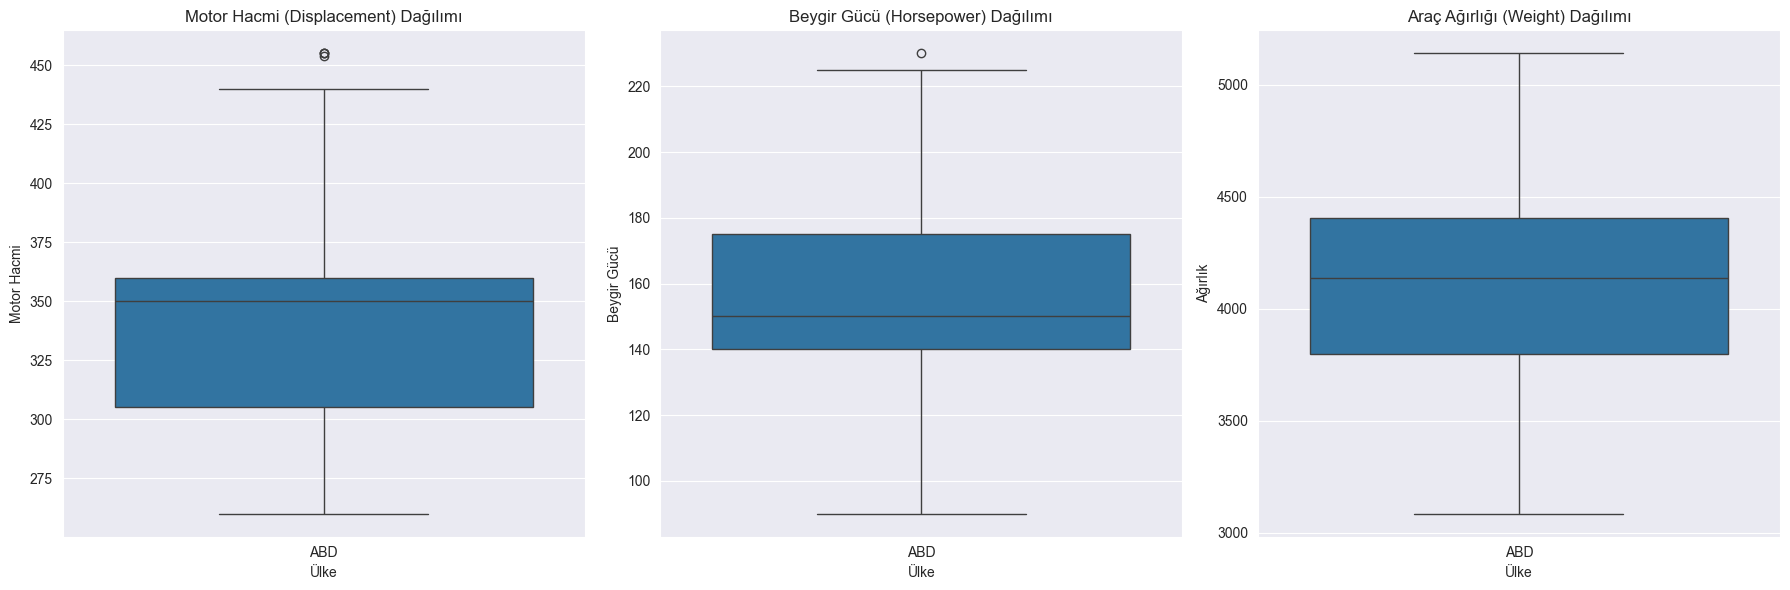

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# 8 silindirli araçlar için veri alt kümesi
df_8_cyl = df[df["cylinders"] == 8]

# Subplot hazırlığı
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Motor Hacmi (displacement)
sns.boxplot(data=df_8_cyl, x="origin", y="displacement", ax=axes[0])
axes[0].set_title("Motor Hacmi (Displacement) Dağılımı")
axes[0].set_xlabel("Ülke")
axes[0].set_ylabel("Motor Hacmi")

# Beygir Gücü (horsepower)
sns.boxplot(data=df_8_cyl, x="origin", y="horsepower", ax=axes[1])
axes[1].set_title("Beygir Gücü (Horsepower) Dağılımı")
axes[1].set_xlabel("Ülke")
axes[1].set_ylabel("Beygir Gücü")

# Ağırlık (weight)
sns.boxplot(data=df_8_cyl, x="origin", y="weight", ax=axes[2])
axes[2].set_title("Araç Ağırlığı (Weight) Dağılımı")
axes[2].set_xlabel("Ülke")
axes[2].set_ylabel("Ağırlık")

plt.tight_layout()
plt.show()


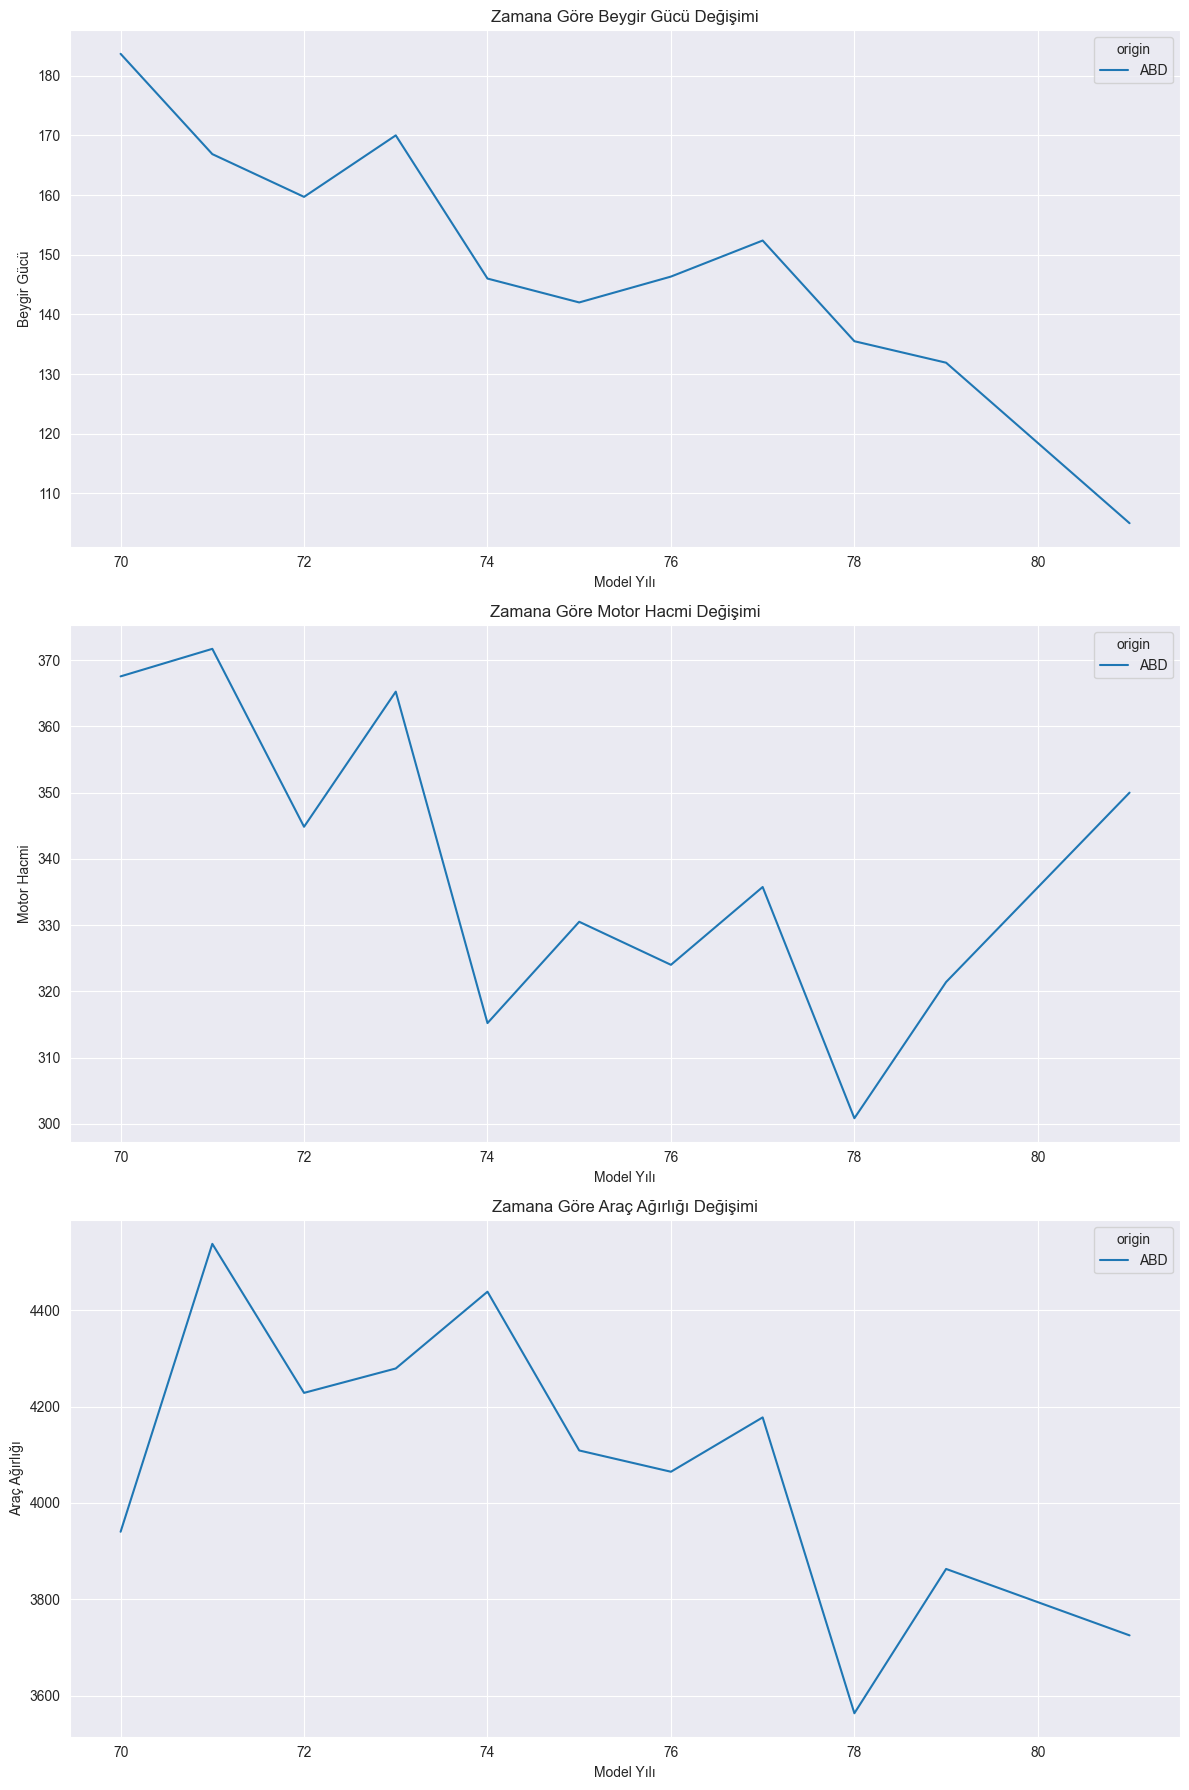

In [33]:
# Ortalama değerleri hesaplayarak zaman serisi
mean_values = df_8_cyl.groupby(["model_year", "origin"])[["horsepower", "displacement", "weight"]].mean().reset_index()

# Çizgi grafikleri
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Beygir Gücü (horsepower)
sns.lineplot(data=mean_values, x="model_year", y="horsepower", hue="origin", ax=axes[0])
axes[0].set_title("Zamana Göre Beygir Gücü Değişimi")
axes[0].set_xlabel("Model Yılı")
axes[0].set_ylabel("Beygir Gücü")

# Motor Hacmi (displacement)
sns.lineplot(data=mean_values, x="model_year", y="displacement", hue="origin", ax=axes[1])
axes[1].set_title("Zamana Göre Motor Hacmi Değişimi")
axes[1].set_xlabel("Model Yılı")
axes[1].set_ylabel("Motor Hacmi")

# Araç Ağırlığı (weight)
sns.lineplot(data=mean_values, x="model_year", y="weight", hue="origin", ax=axes[2])
axes[2].set_title("Zamana Göre Araç Ağırlığı Değişimi")
axes[2].set_xlabel("Model Yılı")
axes[2].set_ylabel("Araç Ağırlığı")

plt.tight_layout()
plt.show()


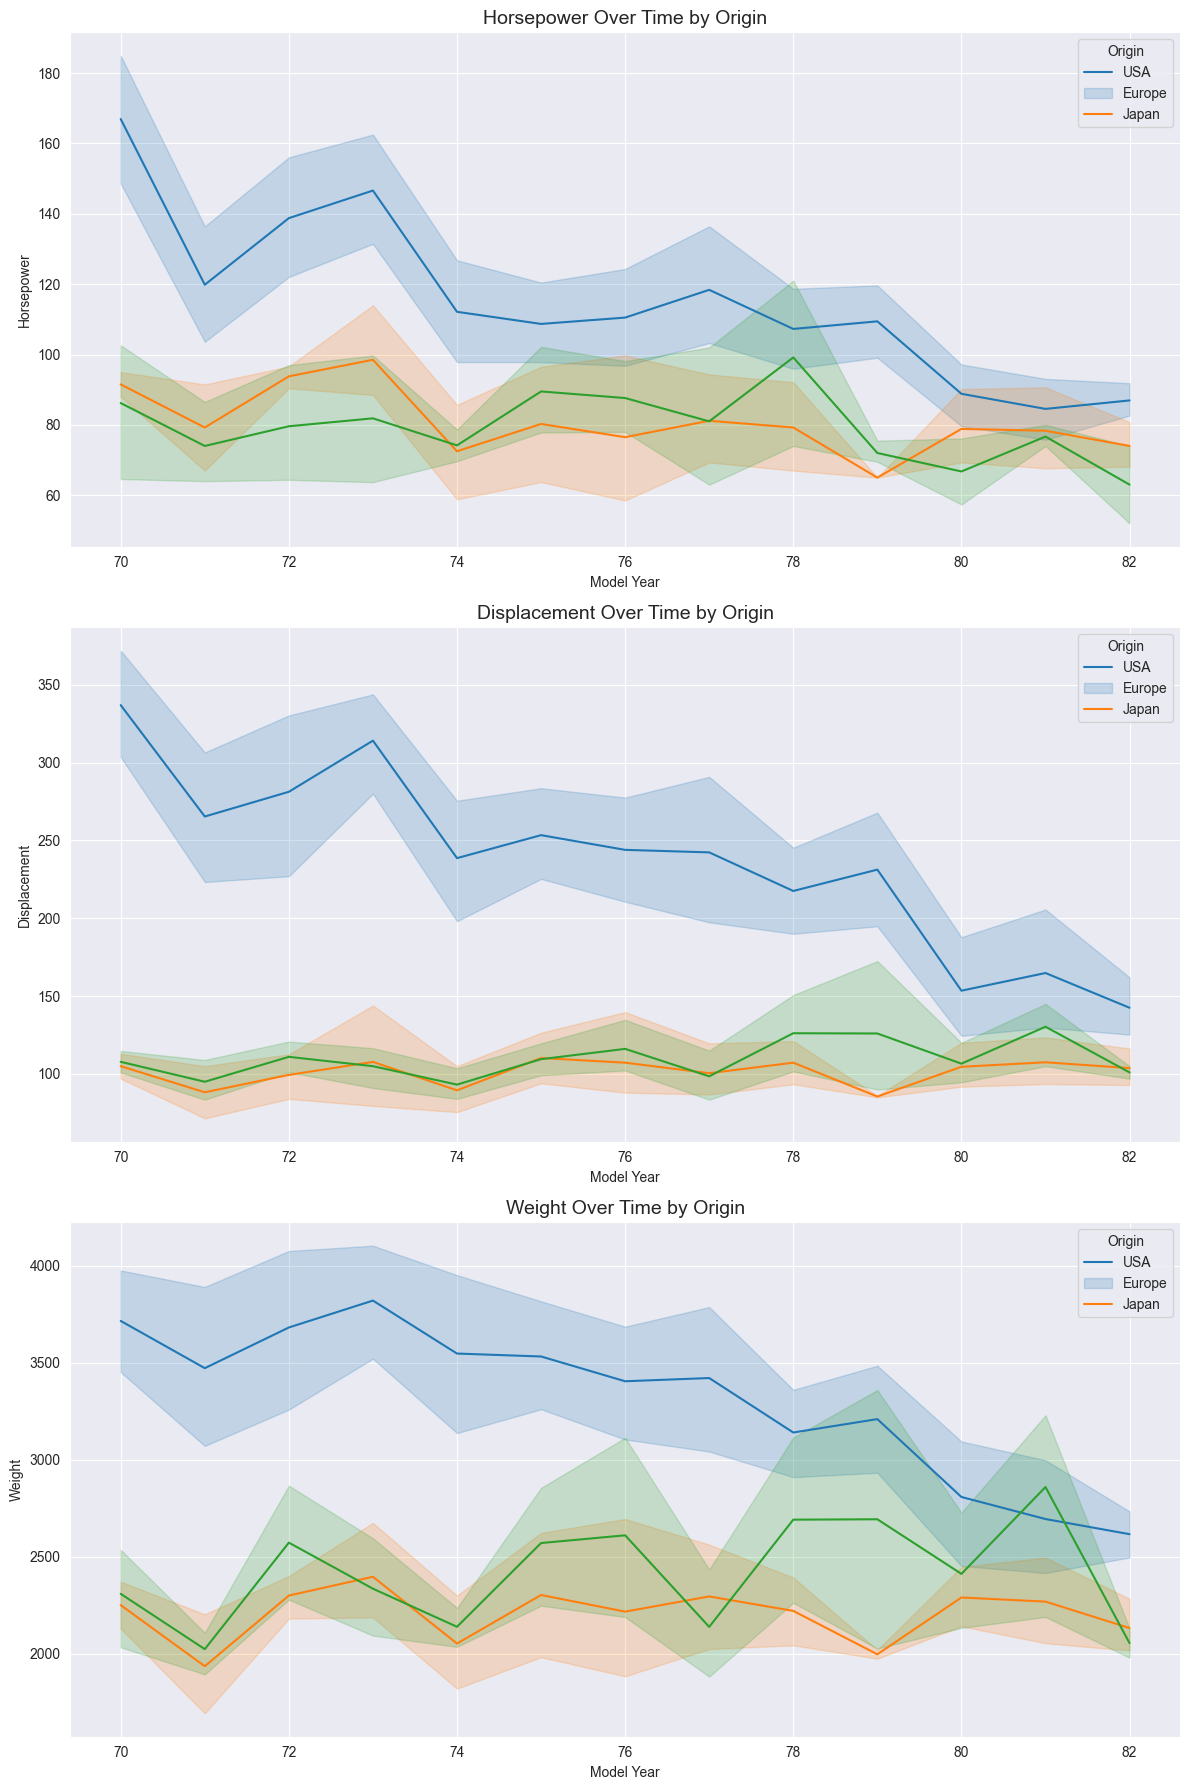

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bölgelere göre veri setini ayırmadan genel bir analiz yapacağız
features = ["horsepower", "displacement", "weight"]  # İncelenecek sayısal özellikler

# Grafik boyutlarını ayarlayalım
fig, axs = plt.subplots(len(features), 1, figsize=(12, 18))

# Her özellik için zaman trendini çiz
for i, feature in enumerate(features):
    sns.lineplot(
        data=df, 
        x="model_year", 
        y=feature, 
        hue="origin",  # Kökenlere göre ayrım
        ax=axs[i]
    )
    axs[i].set_title(f"{feature.capitalize()} Over Time by Origin", fontsize=14)
    axs[i].set_xlabel("Model Year")
    axs[i].set_ylabel(feature.capitalize())
    axs[i].legend(title="Origin", labels=["USA", "Europe", "Japan"])

plt.tight_layout()
plt.show()


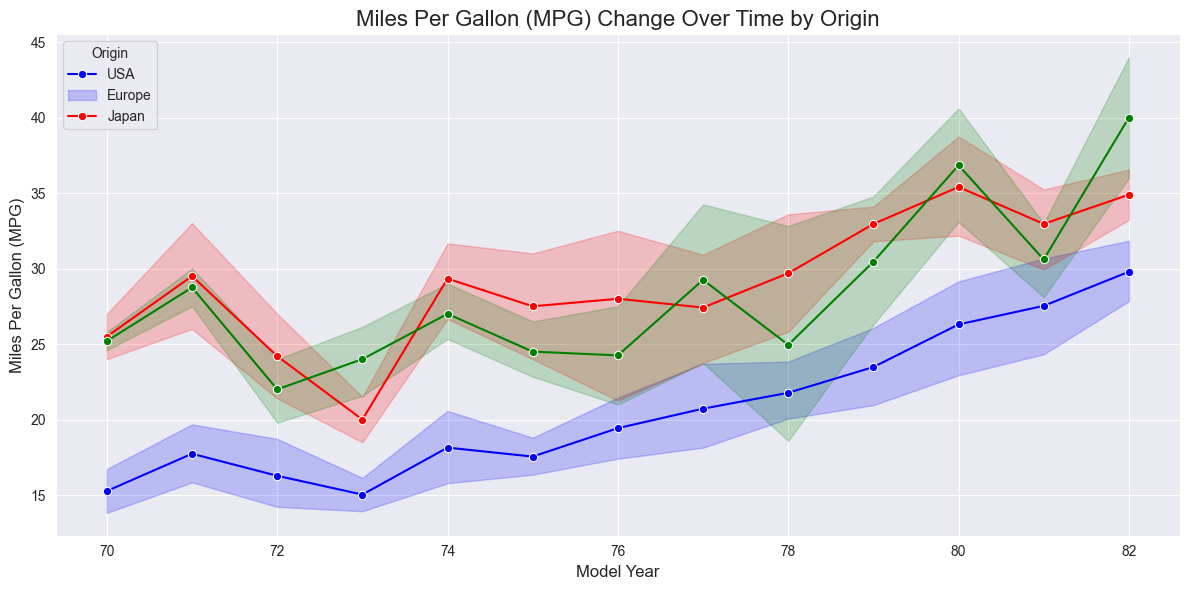

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grafik boyutlarını ayarlayalım
plt.figure(figsize=(12, 6))

# Model yılına göre mpg trendini kökenlere göre çiz
sns.lineplot(
    data=df,
    x="model_year",
    y="mpg",
    hue="origin",  # Kökenlere göre ayrım
    marker="o",    # Noktaları göstermek için
    palette={"ABD": "blue", "Avrupa": "green", "Japonya": "red"}
)


plt.title("Miles Per Gallon (MPG) Change Over Time by Origin", fontsize=16)
plt.xlabel("Model Year", fontsize=12)
plt.ylabel("Miles Per Gallon (MPG)", fontsize=12)
plt.legend(title="Origin", labels=["USA", "Europe", "Japan"], fontsize=10)

plt.tight_layout()
plt.show()


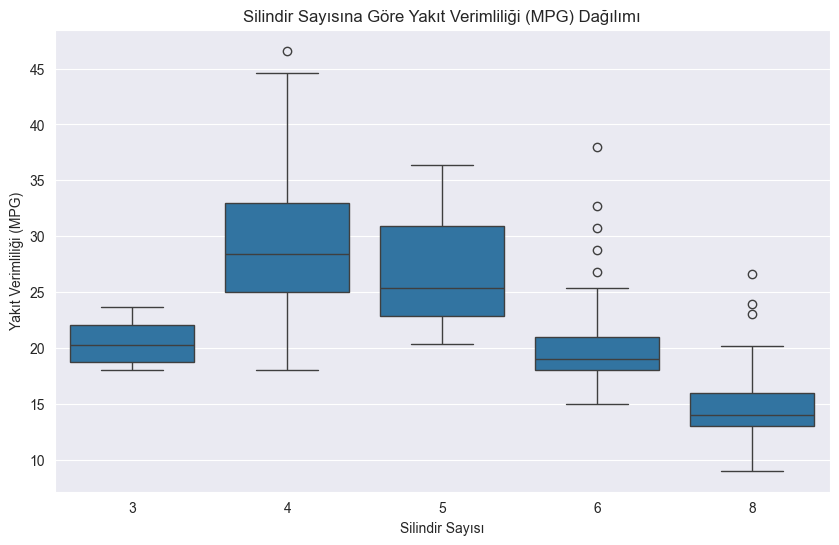

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Silindir sayısına göre mpg boxplot'u
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='cylinders', y='mpg')
plt.title("Silindir Sayısına Göre Yakıt Verimliliği (MPG) Dağılımı")
plt.xlabel("Silindir Sayısı")
plt.ylabel("Yakıt Verimliliği (MPG)")
plt.show()






Null Hipotezi (H₀):
 Silindir sayısı (4, 6 ve 8 silindir) grupları arasında yakıt verimliliği (MPG) açısından anlamlı bir fark yoktur. 

Alternatif Hipotez (H₁):
 Silindir sayısı (4, 6 ve 8 silindir) grupları arasında yakıt verimliliği (MPG) açısından anlamlı bir fark vardır. 

In [37]:
# ANOVA testi: Silindir sayısına göre mpg farkı
# Önce, silindir sayısına göre gruplar oluşturuyoruz
group_4 = df[df['cylinders'] == 4]['mpg']
group_6 = df[df['cylinders'] == 6]['mpg']
group_8 = df[df['cylinders'] == 8]['mpg']
# ANOVA testi
f_stat, p_value = stats.f_oneway(group_4, group_6, group_8)

print(f"ANOVA Testi Sonuçları:\nF-değeri: {f_stat}\nP-değeri: {p_value}")

# P-değeri küçükse, gruplar arasında anlamlı bir fark olduğunu söyleyebiliriz
if p_value < 0.05:
    print("Silindir sayısına göre mpg değerlerinde anlamlı fark var.")
else:
    print("Silindir sayısına göre mpg değerlerinde anlamlı fark yok.")

ANOVA Testi Sonuçları:
F-değeri: 345.9404231836131
P-değeri: 1.825945879770438e-86
Silindir sayısına göre mpg değerlerinde anlamlı fark var.


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     3      4   8.7339 0.0025   2.2306  15.2373   True
     3      5   6.8167 0.3193   -3.019  16.6524  False
     3      6  -0.5765 0.9993  -7.1688   6.0158  False
     3      8  -5.5869 0.1367 -12.1497   0.9759  False
     4      5  -1.9173 0.9561  -9.4082   5.5737  False
     4      6  -9.3104    0.0 -10.9931  -7.6277   True
     4      8 -14.3208    0.0  -15.884 -12.7576   True
     5      6  -7.3932 0.0592 -14.9614   0.1751  False
     5      8 -12.4036 0.0001 -19.9461   -4.861   True
     6      8  -5.0104    0.0  -6.9099  -3.1109   True
------------------------------------------------------


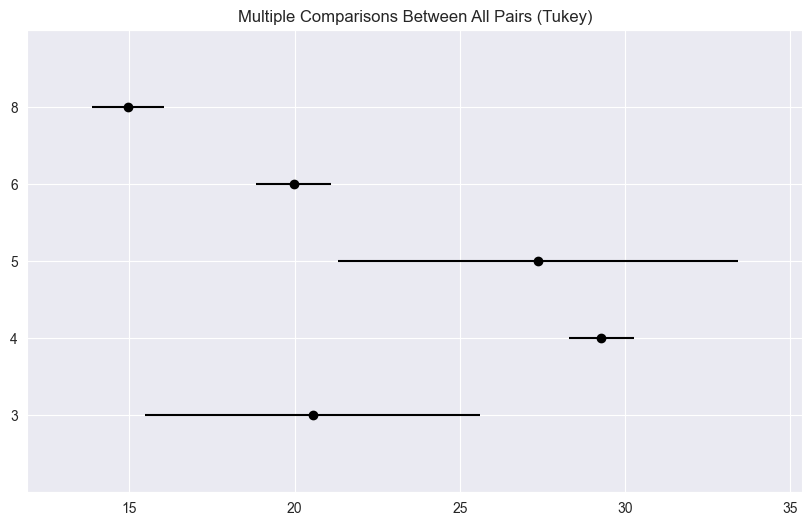

In [38]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


tukey_result = pairwise_tukeyhsd(df['mpg'], df['cylinders'], alpha=0.05)

print(tukey_result)

tukey_result.plot_simultaneous()
plt.show()


4, 6 ve 8 silindirli araçlar arasında yakıt verimliliği açısından anlamlı farklar bulunmuşken, 3 ve 5 silindirli araçlar arasında anlamlı farklar gözlemlenmemektedir.

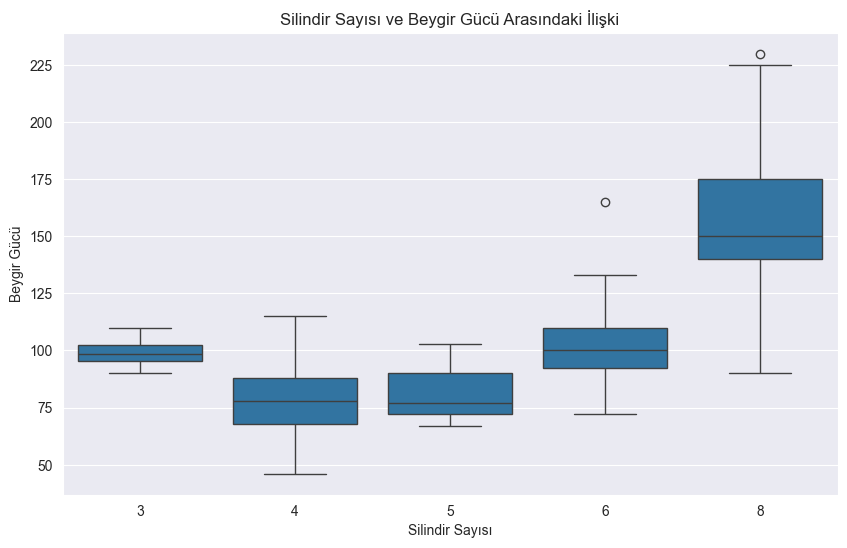

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Beygir gücü ve silindir sayısı arasındaki ilişkiyi çizelim
plt.figure(figsize=(10, 6))
sns.boxplot(x='cylinders', y='horsepower', data=df)
plt.title('Silindir Sayısı ve Beygir Gücü Arasındaki İlişki')
plt.xlabel('Silindir Sayısı')
plt.ylabel('Beygir Gücü')
plt.show()




Levene Testi Hipotezleri (Varyansların Homojenliği): H₀ (Null Hipotezi): Gruplar arasındaki varyanslar homojendir (eşittir).
H₁ (Alternatif Hipotezi): Gruplar arasındaki varyanslar homojen değildir (eşit değildir).


Welch'in ANOVA Testi Hipotezleri:
H₀ (Null Hipotezi): Silindir sayısına göre beygir gücü (horsepower) arasında anlamlı bir fark yoktur.
H₁ (Alternatif Hipotezi): Silindir sayısına göre beygir gücü (horsepower) arasında anlamlı bir fark vardır.

In [40]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import levene

# Levene testi ile varyansların homojenliğini kontrol edelim
group_4 = df[df['cylinders'] == 4]['horsepower']
group_6 = df[df['cylinders'] == 6]['horsepower']
group_8 = df[df['cylinders'] == 8]['horsepower']

# Levene testi
stat, p_value = levene(group_4, group_6, group_8)
print("Levene Testi p-değeri:", p_value)

# Levene testine göre varyanslar homojen değilse Welch'in ANOVA yapılır
if p_value < 0.05:
    # Welch'in ANOVA
    formula = 'horsepower ~ C(cylinders)'  # formül: beygir gücü ~ silindir sayısı
    modelsm = ols(formula, data=df).fit()  # OLS (ordinary least squares) modelini uygula
    anova_table = sm.stats.anova_lm(modelsm, typ=2)  # ANOVA testini uygula
    print(anova_table)  # Sonuçları yazdır
else:
    print("Varyanslar homojen, klasik ANOVA testi yapılabilir.")



Levene Testi p-değeri: 5.702962318916656e-08
                     sum_sq     df           F         PR(>F)
C(cylinders)  437261.557889    4.0  297.855648  1.079822e-116
Residual      142032.074764  387.0         NaN            NaN



Levene testinin p-değeri (5.70e-08), 0.05'ten çok daha küçük olduğu için varyansların homojen olmadığı sonucuna varılabilir. Bu, gruplar arasındaki varyansların eşit olmadığı anlamına gelir, dolayısıyla klasik ANOVA testi geçerli değildir.

Bunun yerine, Welch'in ANOVA testi uygulanmıştır ve sonuçlar şu şekilde:

F-değeri (F-statistic): 297.86
 p-değeri: 1.08e-116
Bu p-değeri de 0.05'ten çok küçük olduğu için, gruplar arasında anlamlı bir fark olduğu sonucuna varılabilir. Yani, silindir sayısı farklı olan araçların beygir güçleri arasında istatistiksel olarak anlamlı bir fark bulunmaktadır.

In [41]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

# Veriyi hazırlama (modeli oluştur)
modelsm = ols('horsepower ~ C(cylinders)', data=df).fit()

# Welch'e uygun post-hoc test
mc = MultiComparison(df['horsepower'], df['cylinders'])
result = mc.tukeyhsd()
print(result.summary())


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     3      4 -20.9686 0.1944 -47.4834   5.5462  False
     3      5 -16.9167 0.7763 -57.0176  23.1843  False
     3      6    2.256 0.9994 -24.6214  29.1334  False
     3      8   59.051    0.0  32.2938  85.8081   True
     4      5   4.0519 0.9963 -26.4892  34.5931  False
     4      6  23.2246    0.0  16.3641  30.0851   True
     4      8  80.0196    0.0  73.6464  86.3927   True
     5      6  19.1727 0.4333 -11.6838  50.0291  False
     5      8  75.9676    0.0  45.2159 106.7194   True
     6      8  56.7949    0.0  49.0504  64.5395   True
------------------------------------------------------


In [42]:
#Köken 3 ve Köken 8: Diğer ülkeler ve köken 8 (diğer ülkeler) arasında beygir gücü açısından anlamlı bir fark vardır.
# Köken 4 ve Köken 6, Köken 4 ve Köken 8: ABD kökenli araçlarla Japon ve diğer ülkeler arasındaki farklar da anlamlıdır.
# Köken 5 ve Köken 8, Köken 6 ve Köken 8: Japonya ve diğer ülkeler arasındaki farklar da istatistiksel olarak anlamlıdır.
# Bu sonuçlar, farklı kökenlere sahip araçlar arasında beygir gücü açısından anlamlı farklılıklar olduğunu göstermektedir.

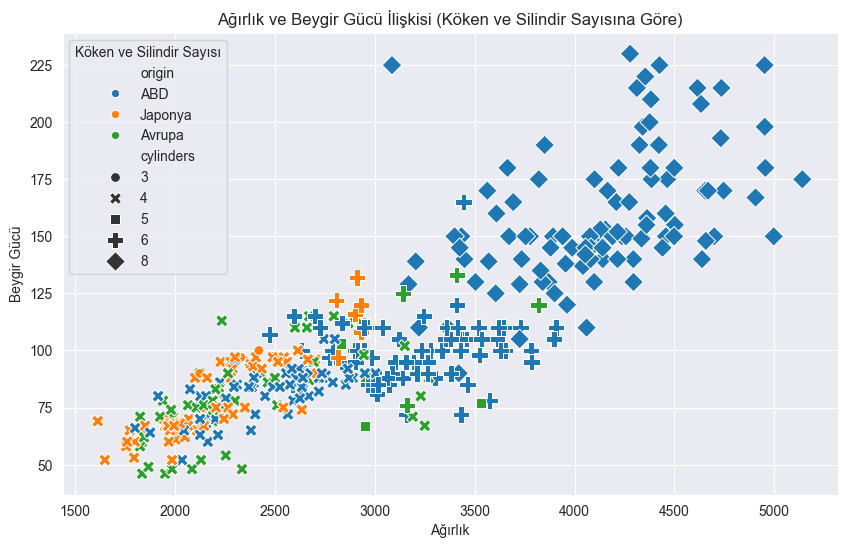

In [43]:
# Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="weight", y="horsepower", hue="origin", style="cylinders", size="cylinders", sizes=(50, 200))
plt.title("Ağırlık ve Beygir Gücü İlişkisi (Köken ve Silindir Sayısına Göre)")
plt.xlabel("Ağırlık")
plt.ylabel("Beygir Gücü")
plt.legend(title="Köken ve Silindir Sayısı")
plt.show()


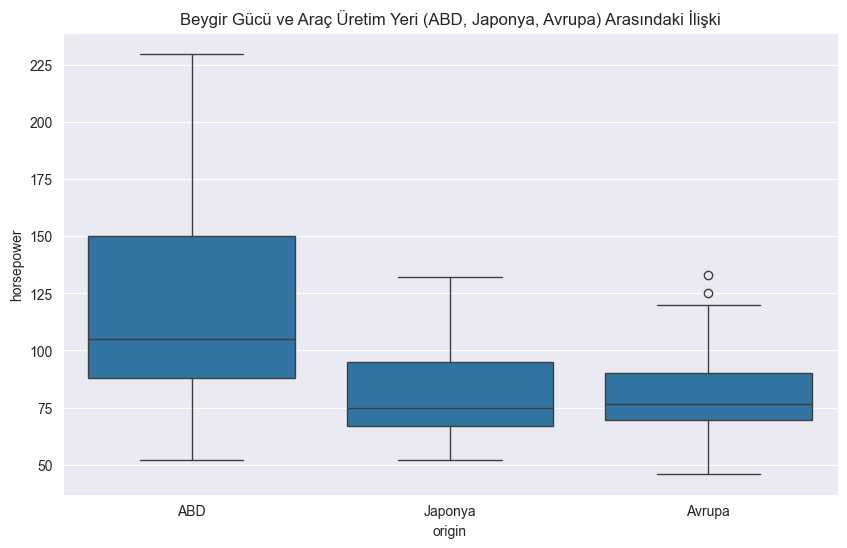

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='origin', y='horsepower', data=df)
plt.title('Beygir Gücü ve Araç Üretim Yeri (ABD, Japonya, Avrupa) Arasındaki İlişki')
plt.xticks([0, 1, 2], ['ABD', 'Japonya', 'Avrupa'])
plt.show()


In [45]:
#Null Hipotezi (H₀): Araç üretim yeri (ABD, Japonya, Avrupa) ile beygir gücü arasında anlamlı bir fark yoktur.
# Alternatif Hipotez (H₁): Araç üretim yeri (ABD, Japonya, Avrupa) ile beygir gücü arasında anlamlı bir fark vardır.

In [46]:
from scipy.stats import mannwhitneyu

# ABD ve diğer kökenler arasındaki beygir gücü farkını Mann-Whitney U testi ile test etme
ab_vehicles = df[df['origin'] == "ABD"]['horsepower']
non_ab_vehicles = df[df['origin'] != "ABD"]['horsepower']

u_stat, p_value = mannwhitneyu(ab_vehicles, non_ab_vehicles)

print("Mann-Whitney U testi istatistiği:", u_stat)
print("Mann-Whitney U testi p-değeri:", p_value)


Mann-Whitney U testi istatistiği: 29158.0
Mann-Whitney U testi p-değeri: 9.508818147459052e-25


In [47]:
#P-değeri çok küçük olduğundan, Null Hipotezini (H₀) reddediyoruz.Yani, araç üretim yeri (ABD, Japonya, Avrupa) ile beygir gücü arasında anlamlı bir fark vardır.
# Bu sonuç, farklı üretim yerlerine sahip araçların beygir güçlerinin birbirinden anlamlı şekilde farklı olduğunu gösteriyor.

In [48]:
# Aykırı değerleri tespit etmek için IQR hesaplama
Q1 = df['acceleration'].quantile(0.25)
Q3 = df['acceleration'].quantile(0.75)
IQR = Q3 - Q1

# Aykırı değerlerin alt ve üst sınırlarını belirle
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerleri tespit et
outliers2 = df[(df['acceleration'] < lower_bound) | (df['acceleration'] > upper_bound)]

print(outliers2)

      mpg cylinders  displacement  horsepower  weight  acceleration  \
7    14.0         8         440.0       215.0    4312           8.5   
9    15.0         8         390.0       190.0    3850           8.5   
11   14.0         8         340.0       160.0    3609           8.0   
59   23.0         4          97.0        54.0    2254          23.5   
195  29.0         4          85.0        52.0    2035          22.2   
196  24.5         4          98.0        60.0    2164          22.1   
209  19.0         4         120.0        88.0    3270          21.9   
299  27.2         4         141.0        71.0    3190          24.8   
300  23.9         8         260.0        90.0    3420          22.2   
326  43.4         4          90.0        48.0    2335          23.7   
394  44.0         4          97.0        52.0    2130          24.6   

     model_year  origin  
7            70     ABD  
9            70     ABD  
11           70     ABD  
59           72  Avrupa  
195          76  

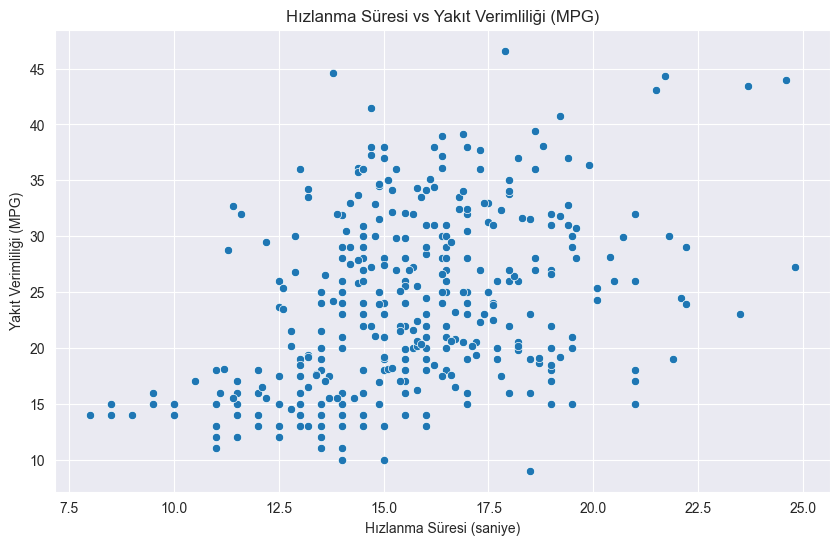

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot oluşturma
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='acceleration', y='mpg')
plt.title('Hızlanma Süresi vs Yakıt Verimliliği (MPG)')
plt.xlabel('Hızlanma Süresi (saniye)')
plt.ylabel('Yakıt Verimliliği (MPG)')
plt.show()


In [50]:
#Null Hipotezi (H₀): Hızlanma süresi (acceleration) ile yakıt verimliliği (mpg) arasında korelasyon yoktur. Yani, bu iki değişken arasında anlamlı bir ilişki yoktur.
# Alternatif Hipotez (H₁): Hızlanma süresi (acceleration) ile yakıt verimliliği (mpg) arasında anlamlı bir korelasyon vardır. Yani, bu iki değişken arasında bir ilişki mevcuttur.

In [51]:
import pandas as pd

# Hızlanma süresi (acceleration) ve Yakıt Verimliliği (mpg) arasındaki Pearson korelasyonunu hesaplama
correlation = df['acceleration'].corr(df['mpg'])

print(f'Hızlanma Süresi ile MPG arasındaki Pearson korelasyon katsayısı: {correlation}')


Hızlanma Süresi ile MPG arasındaki Pearson korelasyon katsayısı: 0.4233285369027874


In [52]:
#Korelasyon katsayısı (0.423), orta düzeyde pozitif bir ilişkiyi gösterir. Yani, hızlanma süresi arttıkça yakıt verimliliği de artma eğiliminde olabilir, ancak bu ilişki çok güçlü değildir.

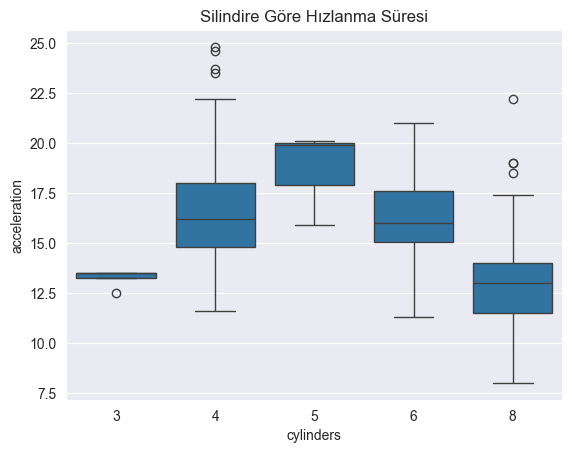

In [53]:
sns.boxplot(x='cylinders', y='acceleration', data=df)
plt.title('Silindire Göre Hızlanma Süresi')
plt.show()


In [54]:
#Null Hipotezi (H₀): Silindir sayısı ile hızlanma süresi (acceleration) arasında anlamlı bir fark yoktur. 
#Alternatif Hipotez (H₁): Silindir sayısı ile hızlanma süresi arasında anlamlı bir fark vardır. 

In [55]:
from scipy.stats import f_oneway

# Grupları oluşturma (bu, sütunları doğru bir şekilde almanızı sağlar)
group_4 = df[df['cylinders'] == 4]['acceleration']
group_6 = df[df['cylinders'] == 6]['acceleration']
group_8 = df[df['cylinders'] == 8]['acceleration']

# ANOVA testi
f_stat, p_value = f_oneway(group_4, group_6, group_8)

# Sonuçları yazdırma
print(f"F-Statistiği: {f_stat}, P-değeri: {p_value}")



F-Statistiği: 91.86020588397642, P-değeri: 2.6739248260131583e-33


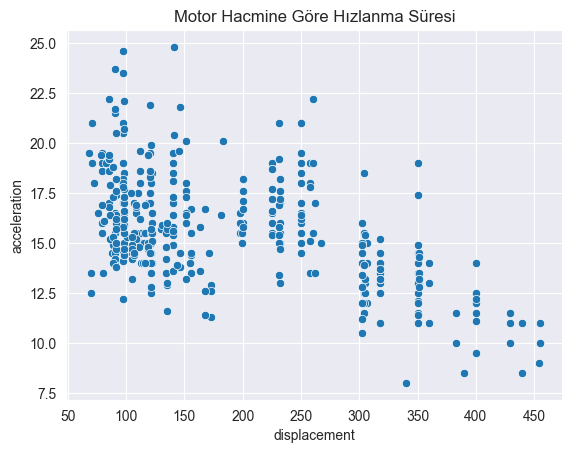

In [56]:
sns.scatterplot(x='displacement', y='acceleration', data=df)
plt.title('Motor Hacmine Göre Hızlanma Süresi')
plt.show()


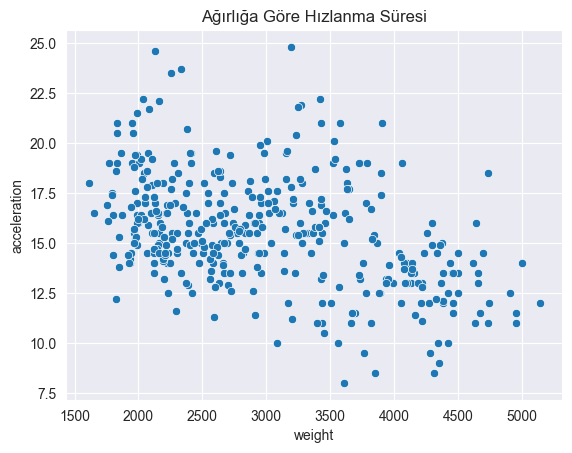

In [57]:
sns.scatterplot(x='weight', y='acceleration', data=df)
plt.title('Ağırlığa Göre Hızlanma Süresi')
plt.show()


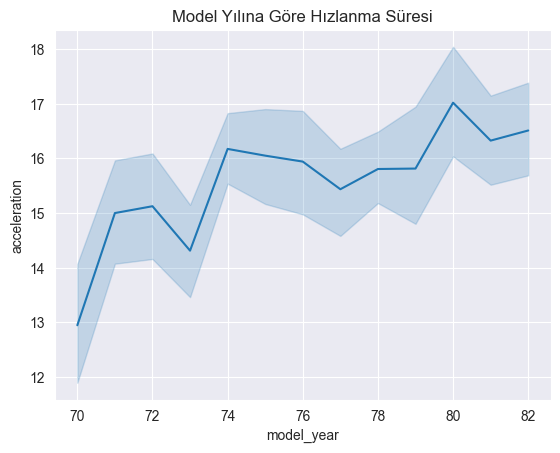

In [58]:
sns.lineplot(x='model_year', y='acceleration', data=df)
plt.title('Model Yılına Göre Hızlanma Süresi')
plt.show()


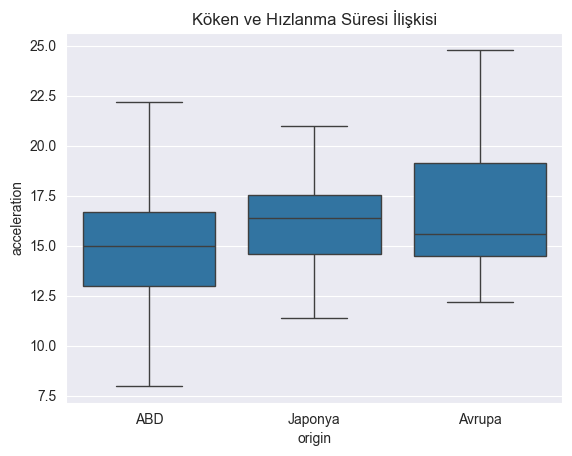

In [59]:
sns.boxplot(x='origin', y='acceleration', data=df)
plt.title('Köken ve Hızlanma Süresi İlişkisi')
plt.show()


In [60]:
#Null Hipotezi (H₀): Köken (origin) ile hızlanma süresi (acceleration) arasında anlamlı bir fark yoktur.
# Alternatif Hipotezi (H₁): Köken (origin) ile hızlanma süresi (acceleration) arasında anlamlı bir fark vardır.

In [80]:
from scipy.stats import f_oneway

# Grupları oluşturma
group_1 = df[df["origin"] == 'ABD']["acceleration"]  # ABD
group_2 = df[df["origin"] == 'Japonya']["acceleration"]  # Japonya
group_3 = df[df["origin"] == 'Avrupa']["acceleration"]  # Avrupa

# ANOVA testi
f_stat, p_value = f_oneway(group_1, group_2, group_3)
print(f"F-Statistiği: {f_stat}, P-değeri: {p_value}")


F-Statistiği: 14.961844022162843, P-değeri: 5.494850233316457e-07


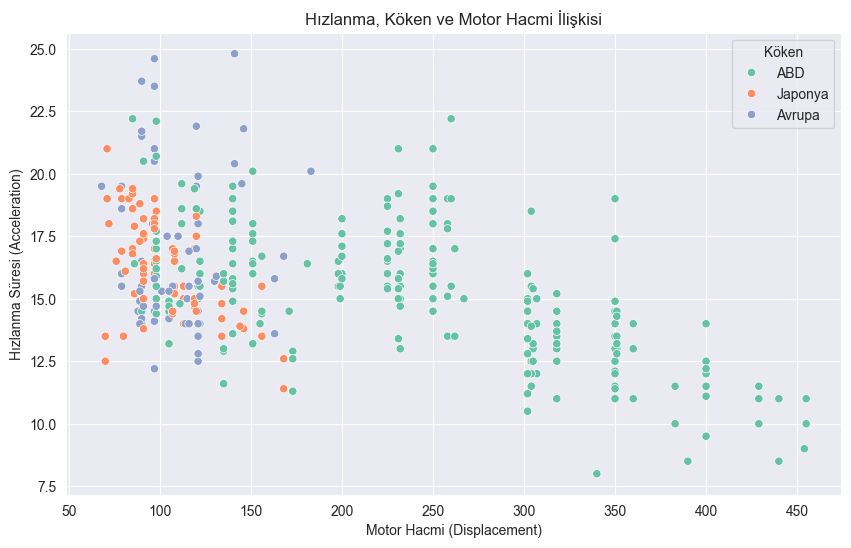

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='displacement', y='acceleration', hue='origin', data=df, palette="Set2")
plt.title('Hızlanma, Köken ve Motor Hacmi İlişkisi')
plt.xlabel('Motor Hacmi (Displacement)')
plt.ylabel('Hızlanma Süresi (Acceleration)')
plt.legend(title='Köken')
plt.show()


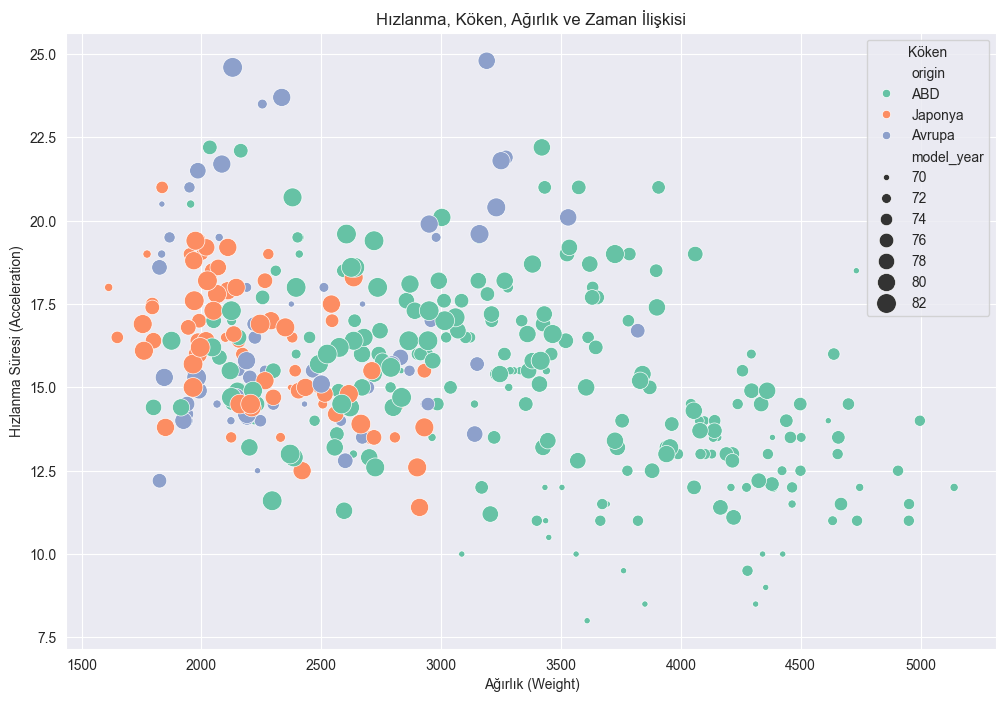

In [64]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='weight', y='acceleration', hue='origin', size='model_year', data=df, sizes=(20, 200), palette="Set2")
plt.title('Hızlanma, Köken, Ağırlık ve Zaman İlişkisi')
plt.xlabel('Ağırlık (Weight)')
plt.ylabel('Hızlanma Süresi (Acceleration)')
plt.legend(title='Köken')
plt.show()


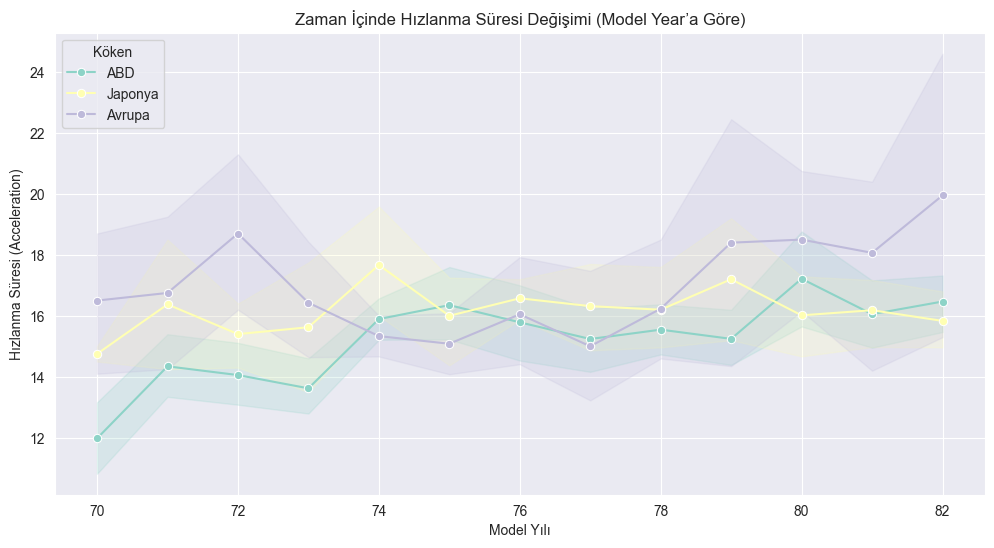

In [65]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='model_year', y='acceleration', data=df, hue='origin', marker="o", palette="Set3")
plt.title('Zaman İçinde Hızlanma Süresi Değişimi (Model Year’a Göre)')
plt.xlabel('Model Yılı')
plt.ylabel('Hızlanma Süresi (Acceleration)')
plt.legend(title='Köken')
plt.show()


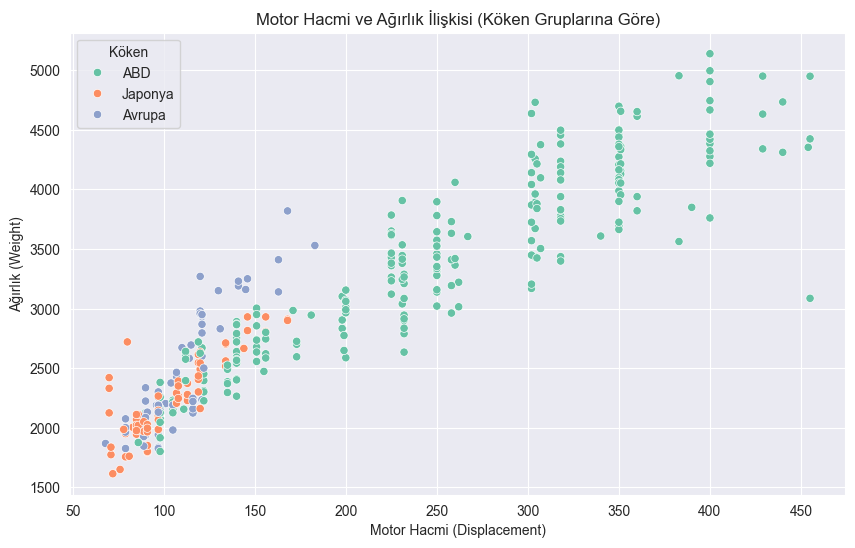

In [66]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='displacement', y='weight', hue='origin', data=df, palette="Set2")
plt.title('Motor Hacmi ve Ağırlık İlişkisi (Köken Gruplarına Göre)')
plt.xlabel('Motor Hacmi (Displacement)')
plt.ylabel('Ağırlık (Weight)')
plt.legend(title='Köken')
plt.show()


In [67]:
outliers1_percent = (len(outliers1) / len(df)) * 100
print(f"Aykırı değer yüzdesi: {outliers1_percent}%")


Aykırı değer yüzdesi: 2.5510204081632653%


In [68]:
outliers2_percent = (len(outliers2) / len(df)) * 100
print(f"Aykırı değer yüzdesi: {outliers2_percent}%")

Aykırı değer yüzdesi: 2.806122448979592%


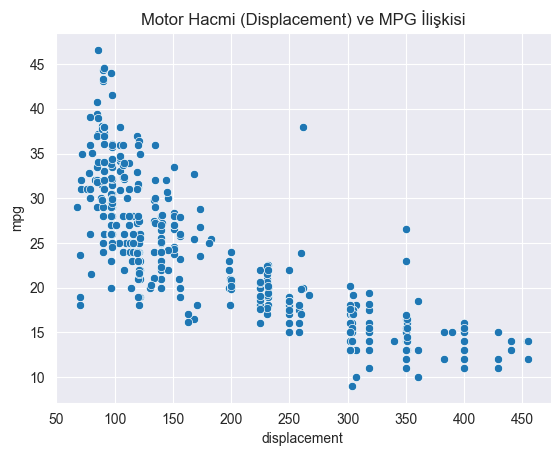

In [69]:
sns.scatterplot(x='displacement', y='mpg', data=df)
plt.title("Motor Hacmi (Displacement) ve MPG İlişkisi")
plt.show()


In [70]:
#Null Hipotezi (H₀): Hacim (displacement) ile yakıt verimliliği (mpg) arasında lineer bir ilişki yoktur.
# Alternatif Hipotezi (H₁): Hacim (displacement) ile yakıt verimliliği (mpg) arasında anlamlı bir lineer ilişki vardır.

In [71]:
from scipy.stats import pearsonr

# Pearson korelasyonu
corr, p_value = pearsonr(df['displacement'], df['mpg'])
print(f"Pearson Korelasyonu: {corr}, P-değeri: {p_value}")


Pearson Korelasyonu: -0.8051269467104578, P-değeri: 1.6606418277978277e-90


In [72]:
#earson Korelasyonu: -0.8051, bu da hacim (displacement) ile yakıt verimliliği (mpg) arasında güçlü, negatif bir doğrusal ilişki olduğunu gösteriyor. Yani, hacim arttıkça yakıt verimliliği genellikle azalır.

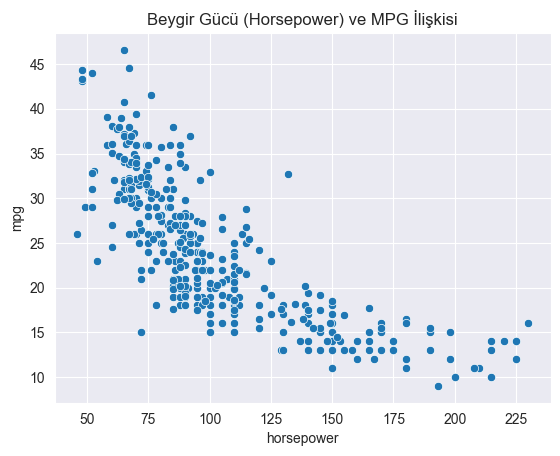

In [73]:
sns.scatterplot(x='horsepower', y='mpg', data=df)
plt.title("Beygir Gücü (Horsepower) ve MPG İlişkisi")
plt.show()


Null Hipotezi (H₀): Beygir gücü (horsepower) ile yakıt verimliliği (mpg) arasında anlamlı bir doğrusal ilişki yoktur.
Alternatif Hipotezi (H₁): Beygir gücü (horsepower) ile yakıt verimliliği (mpg) arasında anlamlı bir doğrusal ilişki vardır 

In [74]:
corr, p_value = pearsonr(df['horsepower'], df['mpg'])
print(f"Pearson Korelasyonu: {corr}, P-değeri: {p_value}")


Pearson Korelasyonu: -0.7784267838977759, P-değeri: 7.031989029405005e-81


Beygir gücü (horsepower) ile yakıt verimliliği (mpg) arasında anlamlı bir negatif doğrusal ilişki bulunmaktadır. Pearson korelasyon katsayısı -0.7784, bu ilişkiyi oldukça güçlü bir şekilde ifade etmektedir.

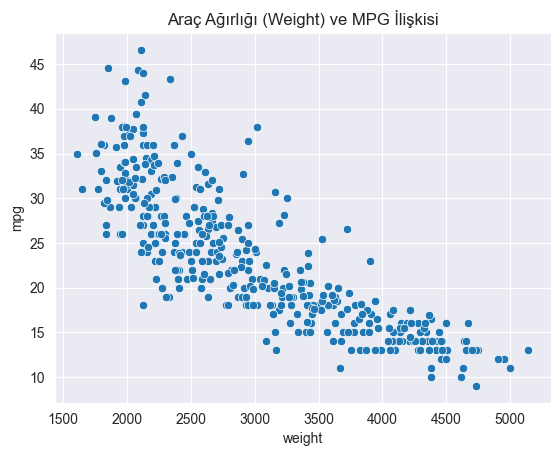

In [75]:
sns.scatterplot(x='weight', y='mpg', data=df)
plt.title("Araç Ağırlığı (Weight) ve MPG İlişkisi")
plt.show()


Null Hipotez (H₀): Araba ağırlığı (weight) ile yakıt verimliliği (mpg) arasında bir ilişki yoktur, yani korelasyon katsayısı sıfırdır 
Alternatif Hipotez (H₁): Araba ağırlığı (weight) ile yakıt verimliliği (mpg) arasında bir ilişki vardır, yani korelasyon katsayısı sıfırdan farklıdır 

In [76]:
corr, p_value = pearsonr(df['weight'], df['mpg'])
print(f"Pearson Korelasyonu: {corr}, P-değeri: {p_value}")


Pearson Korelasyonu: -0.8322442148315752, P-değeri: 6.0152960514372186e-102


Pearson Korelasyon Katsayısı: -0.832, bu, araba ağırlığı (weight) ile yakıt verimliliği (mpg) arasında güçlü negatif bir ilişki olduğunu gösteriyor. Yani, arabaların ağırlığı arttıkça yakıt verimliliği (mpg) düşme eğilimindedir.

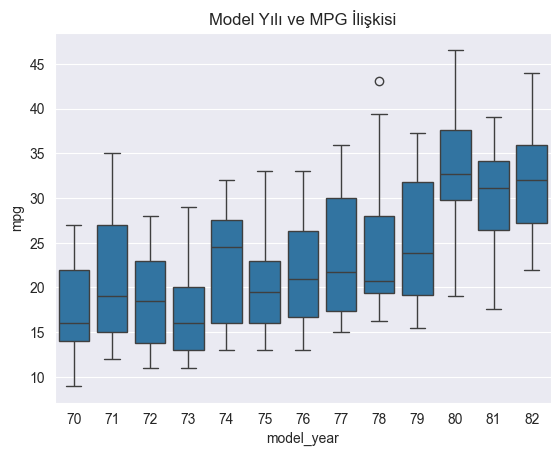

In [77]:
sns.boxplot(x='model_year', y='mpg', data=df)
plt.title("Model Yılı ve MPG İlişkisi")
plt.show()


Null Hipotezi (H₀): Farklı model yıllarındaki araçların yakıt verimliliği (mpg) ortalamaları arasında anlamlı bir fark yoktur.
Alternatif Hipotez (H₁): Farklı model yıllarındaki araçların yakıt verimliliği (mpg) ortalamaları arasında anlamlı bir fark vardır.

In [78]:
grouped_mpg = [df[df['model_year'] == year]['mpg'] for year in df['model_year'].unique()]
f_stat, p_value = f_oneway(*grouped_mpg)
print(f"F-statistic: {f_stat}, P-değeri: {p_value}")


F-statistic: 23.802075674974724, P-değeri: 1.986801328092588e-39


#P-değeri 0.05'ten çok daha küçük olduğu için null hipotezi reddedilir ve alternatif hipotez kabul edilir. Bu da, farklı model yılları arasındaki araçların yakıt verimliliği (mpg) ortalamaları arasında istatistiksel olarak anlamlı bir fark olduğu anlamına gelir.

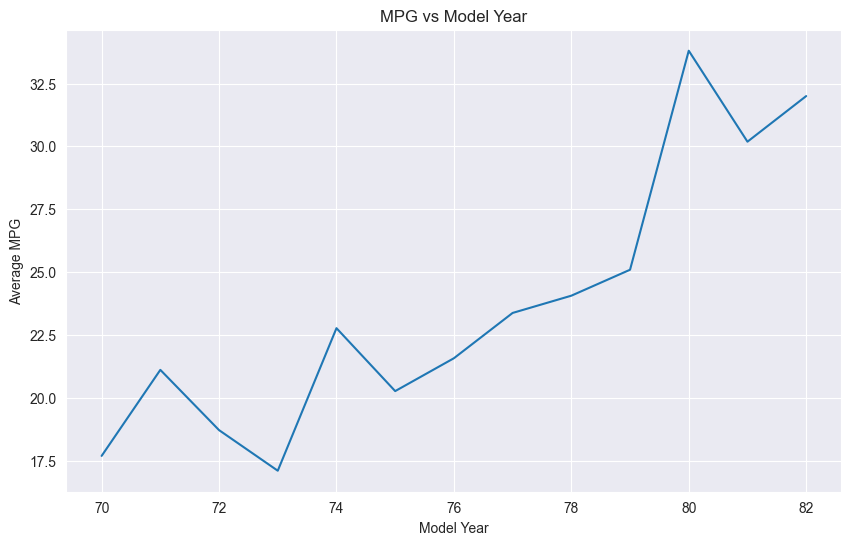

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Model yılına göre ortalama MPG'yi hesaplama
df_grouped = df.groupby('model_year')['mpg'].mean().reset_index()

# Zaman serisi çizimi
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x='model_year', y='mpg')
plt.title('MPG vs Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.grid(True)
plt.show()


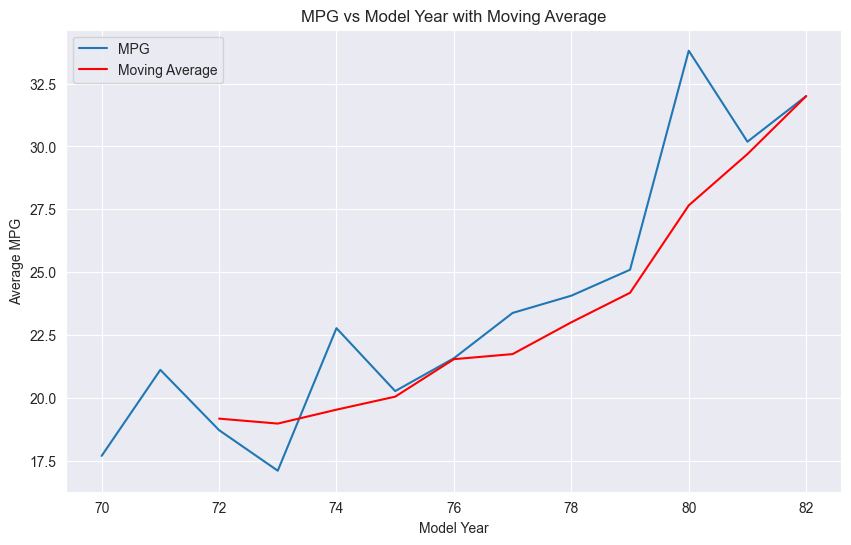

In [82]:
# Hareketli ortalama hesaplama (örneğin 3 yıllık ortalama)
df_grouped['moving_average'] = df_grouped['mpg'].rolling(window=3).mean()

# Zaman serisi ve hareketli ortalama çizimi
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x='model_year', y='mpg', label='MPG')
sns.lineplot(data=df_grouped, x='model_year', y='moving_average', label='Moving Average', color='red')
plt.title('MPG vs Model Year with Moving Average')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.legend()
plt.grid(True)
plt.show()


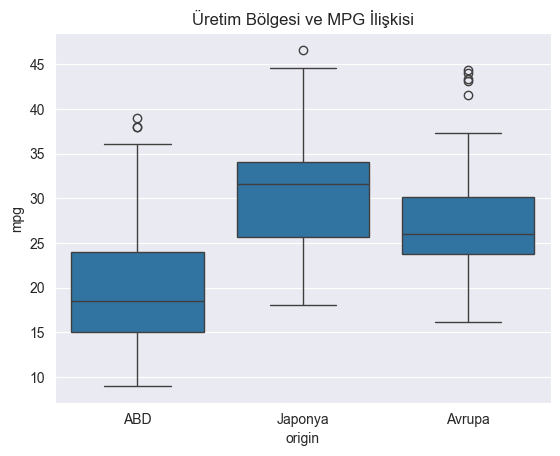

In [83]:
sns.boxplot(x='origin', y='mpg', data=df)
plt.title("Üretim Bölgesi ve MPG İlişkisi")
plt.show()


Null Hipotezi (H₀): Araçların üretim yerlerine (Köken) göre ortalama yakıt verimliliği (mpg) arasında anlamlı bir fark yoktur.
Alternatif Hipotezi (H₁): Araçların üretim yerlerine (Köken) göre ortalama yakıt verimliliği (mpg) arasında anlamlı bir fark vardır.

In [84]:
grouped_mpg_origin = [df[df['origin'] == origin]['mpg'] for origin in df['origin'].unique()]
f_stat, p_value = f_oneway(*grouped_mpg_origin)
print(f"F-statistic: {f_stat}, P-değeri: {p_value}")


F-statistic: 96.60153016314955, P-değeri: 8.67381844800945e-35


#P-değeri çok düşük (0.05'ten küçük) olduğundan, null hipotezi (H₀) reddedilir. Bu da, araçların üretim yerlerine (Köken) göre ortalama yakıt verimliliği (mpg) arasında anlamlı bir fark olduğunu gösterir.

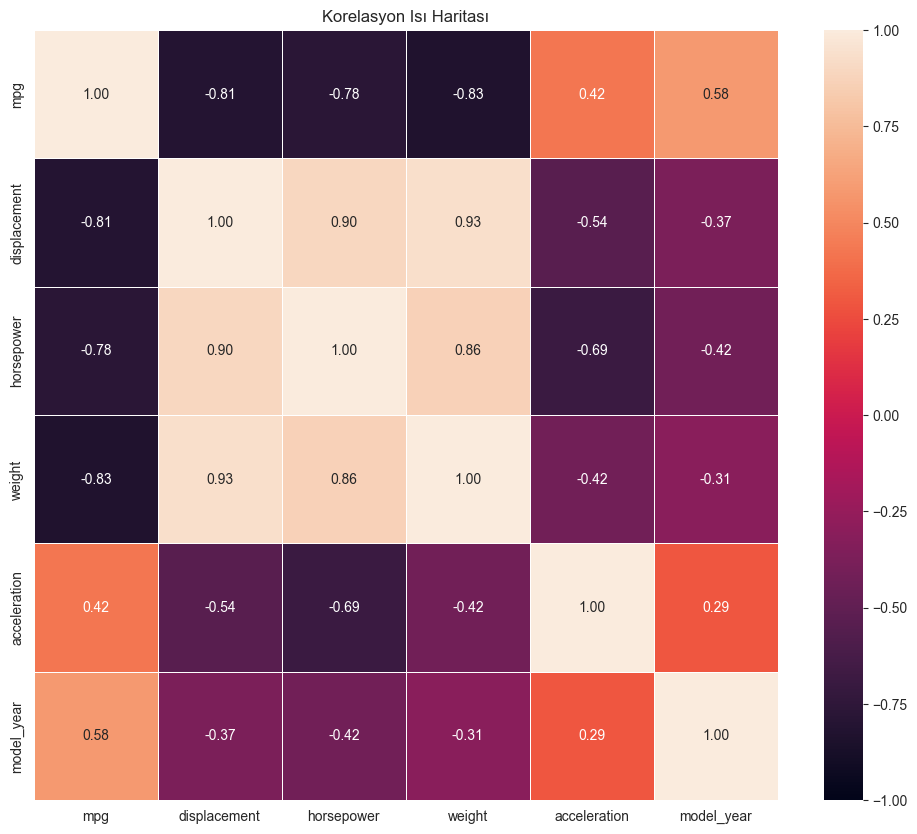

In [85]:

# Kategorik sütunları çıkar
filtered_df = df.drop(columns=df.select_dtypes(include=['object']).columns)


correlation_matrix=filtered_df.corr()

# Isı haritası için görselleştirme
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title('Korelasyon Isı Haritası')
plt.show()


mpg ve displacement (-0.81):Motor hacmi arttıkça yakıt verimliliği düşmektedir. Bu, daha büyük motorların daha fazla yakıt tüketmesiyle ilişkilendirilebilir.
 mpg ve horsepower (-0.78):Motor gücü arttıkça yakıt verimliliği azalıyor. Güçlü motorlar genelde daha fazla yakıt tükettiği için bu ilişki beklenir.
 mpg ve weight (-0.83):Araç ağırlığı ile yakıt verimliliği arasında çok güçlü bir negatif ilişki var. Ağır araçlar daha fazla enerjiye ihtiyaç duyduğundan bu da beklenen bir sonuçtur.
 mpg ve acceleration (0.42):Pozitif bir ilişki bulunuyor. Hızlanma süresinin artması, genelde daha az güçlü ve daha verimli motorların varlığına işaret edebilir.
mpg ve model_year (0.58):Daha yeni model araçlarda yakıt verimliliği artıyor. Bu, teknolojik gelişmeler ve yakıt ekonomisi regülasyonlarıyla açıklanabilir.

In [86]:

target = 'mpg'
correlation_with_target = correlation_matrix[target].sort_values(ascending=False)
print(correlation_with_target)


mpg             1.000000
model_year      0.580541
acceleration    0.423329
horsepower     -0.778427
displacement   -0.805127
weight         -0.832244
Name: mpg, dtype: float64


In [87]:
#R-kare: 0.809. Model, bağımlı değişkenin (mpg) %80.9'unu açıklamaktadır, bu da modelin oldukça iyi bir uyum sağladığını gösterir.
#F-istatistiği: 408.8, P-değeri: 1.72e-137. Bu, modelin genel olarak anlamlı olduğunu gösterir.
#Bağımsız Değişkenlerin Sonuçları:
#Sabir (const): -15.39. Bu, diğer tüm değişkenlerin sıfır olduğu durumda yakıt verimliliğinin -15.39 birim olduğunu belirtir. Sonuç istatistiği çok anlamlı (P<0.01).
#Beygir Gücü (horsepower): Katsayısı 0.0026. Bu, beygir gücündeki her bir birim artışının yakıt verimliliğini 0.0026 birim artıracağını gösterir. Ancak, P-değeri (0.845) istatistiksel olarak anlamlı değildir.
#Hızlanma (acceleration): Katsayısı 0.0802. Hızlanmadaki her bir birim artışının yakıt verimliliğini 0.0802 birim artıracağı görülmektedir. Ancak, P-değeri (0.422) anlamlı değildir.
#Model Yılı (model_year): Katsayısı 0.7511. Model yılı her arttığında yakıt verimliliği 0.7511 birim artmaktadır. P-değeri (0.000) anlamlıdır.
#Ağırlık (weight): Katsayısı -0.0066. Ağırlık arttıkça yakıt verimliliği azalır. P-değeri (0.000) anlamlıdır.
#Diğer İstatistiksel Testler:
#Omnibus Testi ve Jarque-Bera Testi: Bu testler modelin normal dağılımdan sapıp sapmadığını kontrol eder. Burada, p-değerleri çok düşük (0.000 ve 6.22e-14), bu da normal dağılım varsayımının ihlal edildiğini gösteriyor.
#Durbin-Watson: 1.223. Bu, otokorelasyonun yüksek olduğunu, yani modeldeki hata terimlerinin birbirine yakın olduğunu gösterir.
#Condition Number: 83,500. Bu, multikollinearlik (bağımsız değişkenler arasında yüksek korelasyon) sorununa işaret edebilir.
#VIF (Variance Inflation Factor) Değerleri:
#Horsepower: 8.81. Bu, beygir gücünün yüksek düzeyde multikollinearlik olduğunu ve modeldeki etkisini etkileyebileceğini gösteriyor.
#Acceleration: 2.52. Bu değerin çok yüksek olmadığı görülüyor, bu da düşük multikollinearlik gösteriyor.
#Model Year: 1.23. Bu da düşük bir multikollinearlik olduğunu gösteriyor.
#Weight: 5.30. Bu, makul düzeyde bir multikollinearlik olduğunu gösteriyor.
#Sonuçlar:
#Model yılı ve ağırlık yakıt verimliliği üzerinde anlamlı etkilere sahiptir.
#Beygir gücü ve hızlanma yakıt verimliliği üzerinde anlamlı etkiye sahip değildir.
#Modelde yüksek multikollinearlik sorunu olabilir, özellikle beygir gücü ve ağırlık arasında güçlü bir ilişki bulunmaktadır."

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    object 
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 27.6+ KB


In [88]:
x = df.iloc[:, 1:].values 
y = df.iloc[:, 0].values
print(x)
print(y)

[[8 307.0 130.0 ... 12.0 70 'ABD']
 [8 350.0 165.0 ... 11.5 70 'ABD']
 [8 318.0 150.0 ... 11.0 70 'ABD']
 ...
 [4 135.0 84.0 ... 11.6 82 'ABD']
 [4 120.0 79.0 ... 18.6 82 'ABD']
 [4 119.0 82.0 ... 19.4 82 'ABD']]
[18.  15.  18.  16.  17.  15.  14.  14.  14.  15.  15.  14.  15.  14.
 24.  22.  18.  21.  27.  26.  25.  24.  25.  26.  21.  10.  10.  11.
  9.  27.  28.  25.  19.  16.  17.  19.  18.  14.  14.  14.  14.  12.
 13.  13.  18.  22.  19.  18.  23.  28.  30.  30.  31.  35.  27.  26.
 24.  25.  23.  20.  21.  13.  14.  15.  14.  17.  11.  13.  12.  13.
 19.  15.  13.  13.  14.  18.  22.  21.  26.  22.  28.  23.  28.  27.
 13.  14.  13.  14.  15.  12.  13.  13.  14.  13.  12.  13.  18.  16.
 18.  18.  23.  26.  11.  12.  13.  12.  18.  20.  21.  22.  18.  19.
 21.  26.  15.  16.  29.  24.  20.  19.  15.  24.  20.  11.  20.  19.
 15.  31.  26.  32.  25.  16.  16.  18.  16.  13.  14.  14.  14.  29.
 26.  26.  31.  32.  28.  24.  26.  24.  26.  31.  19.  18.  15.  15.
 16.  15.  16.  1

In [89]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,5,6])], remainder='passthrough')
x=np.array(ct.fit_transform(x))
print(x)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2744 stored elements and shape (392, 25)>
  Coords	Values
  (0, 4)	1.0
  (0, 5)	1.0
  (0, 18)	1.0
  (0, 21)	307.0
  (0, 22)	130.0
  (0, 23)	3504.0
  (0, 24)	12.0
  (1, 4)	1.0
  (1, 5)	1.0
  (1, 18)	1.0
  (1, 21)	350.0
  (1, 22)	165.0
  (1, 23)	3693.0
  (1, 24)	11.5
  (2, 4)	1.0
  (2, 5)	1.0
  (2, 18)	1.0
  (2, 21)	318.0
  (2, 22)	150.0
  (2, 23)	3436.0
  (2, 24)	11.0
  (3, 4)	1.0
  (3, 5)	1.0
  (3, 18)	1.0
  (3, 21)	304.0
  :	:
  (388, 21)	97.0
  (388, 22)	52.0
  (388, 23)	2130.0
  (388, 24)	24.6
  (389, 1)	1.0
  (389, 17)	1.0
  (389, 18)	1.0
  (389, 21)	135.0
  (389, 22)	84.0
  (389, 23)	2295.0
  (389, 24)	11.6
  (390, 1)	1.0
  (390, 17)	1.0
  (390, 18)	1.0
  (390, 21)	120.0
  (390, 22)	79.0
  (390, 23)	2625.0
  (390, 24)	18.6
  (391, 1)	1.0
  (391, 17)	1.0
  (391, 18)	1.0
  (391, 21)	119.0
  (391, 22)	82.0
  (391, 23)	2720.0
  (391, 24)	19.4


In [92]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)  # sparse_output'u False yap
x = encoder.fit_transform(df)


In [93]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [94]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

y_pred=regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),axis=1))


[[27.97 28.  ]
 [28.   22.3 ]
 [13.68 12.  ]
 [38.43 38.  ]
 [35.95 33.8 ]
 [22.12 19.4 ]
 [33.57 38.1 ]
 [33.59 30.  ]
 [17.47 20.  ]
 [26.7  20.  ]
 [24.3  27.  ]
 [15.95 16.5 ]
 [23.36 24.5 ]
 [10.85 11.  ]
 [20.86 16.9 ]
 [34.77 33.7 ]
 [25.57 21.6 ]
 [14.46 14.  ]
 [25.97 26.  ]
 [26.16 28.4 ]
 [13.41 13.  ]
 [18.37 16.  ]
 [22.2  20.  ]
 [21.49 25.  ]
 [35.86 41.5 ]
 [15.48 14.  ]
 [29.12 25.8 ]
 [28.01 25.1 ]
 [17.95 20.  ]
 [13.91 17.  ]
 [18.32 20.  ]
 [29.57 31.6 ]
 [26.15 22.  ]
 [28.35 26.  ]
 [18.79 21.  ]
 [29.72 29.8 ]
 [30.89 31.  ]
 [12.09 13.  ]
 [16.3  16.  ]
 [15.43 14.  ]
 [15.1  15.  ]
 [33.5  44.6 ]
 [32.38 31.3 ]
 [15.59 16.  ]
 [27.43 29.  ]
 [14.34 16.  ]
 [31.22 29.  ]
 [13.62 13.  ]
 [17.37 17.5 ]
 [18.29 18.  ]
 [25.84 26.  ]
 [14.88 15.  ]
 [14.96 10.  ]
 [23.47 22.  ]
 [31.99 34.3 ]
 [24.71 30.7 ]
 [26.25 20.2 ]
 [17.23 22.  ]
 [30.44 33.  ]
 [23.11 21.  ]
 [18.03 22.  ]
 [28.26 24.  ]
 [28.63 31.5 ]
 [14.6  15.  ]
 [28.6  26.  ]
 [14.21 16.  ]
 [14.46 14

In [96]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
r2_score(y_test, y_pred)
print("R2 Score (MSE):", r2_score(y_test, y_pred))

Mean Squared Error (MSE): 9.303108853906588
R2 Score (MSE): 0.8503248052744864


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     317.2
Date:                Sun, 22 Dec 2024   Prob (F-statistic):          5.37e-104
Time:                        23:18:51   Log-Likelihood:                -1118.3
No. Observations:                 392   AIC:                             2245.
Df Residuals:                     388   BIC:                             2261.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1492      5.584     -0.027   

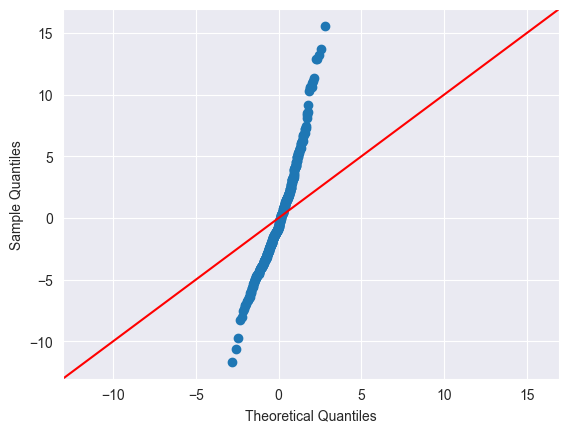

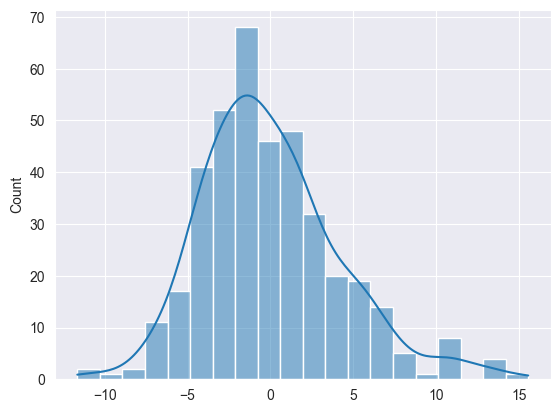

In [97]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro



X=df[['model_year','horsepower','acceleration']]
y=df['mpg']
# Sabit terimi (intercept) eklemek
X= sm.add_constant(X)

# Regresyon modelini kurma
model = sm.OLS(y, X).fit()
print(model.summary())


# 2. Hataların normal dağılıma uygunluğu (Shapiro-Wilk testi)
stat, p_value = shapiro(model.resid)
print("Shapiro-Wilk p-değeri:", p_value)

# 3. Çoklu doğrusal bağımlılık kontrolü (VIF)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

# Hataların dağılımını görmek için Q-Q plot
sm.qqplot(model.resid, line ='45')
plt.show()

# Hataların dağılımını görsel olarak kontrol etmek
sns.histplot(model.resid, kde=True)
plt.show()
